# Creación de modelos con y sin PCA
#### Karla Rebeca Munguía Romero A01741255

In [460]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import sklearn.datasets
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import time

# PREPARACIÓN DE DATOS

## MNIST

In [461]:
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = keras.datasets.fashion_mnist.load_data()

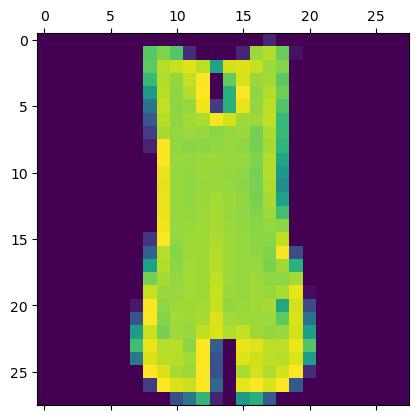

In [462]:
plt.matshow(X_train_mnist[4])


In [463]:
X_train_mnist.shape

(60000, 28, 28)

In [464]:
X_train_mnist = X_train_mnist / 255
X_test_mnist  = X_test_mnist / 255

In [465]:
X_train_mnist_flattened = X_train_mnist.reshape(len(X_train_mnist), 28*28)
X_test_mnist_flattened  = X_test_mnist.reshape(len(X_test_mnist), 28*28)

## ADS

In [466]:
df=pd.read_csv(r'C:\Users\karla\OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey\Uni\semestre 3\fisica\reto\dataintads\datita.txt')

C:\Users\karla\AppData\Local\Temp\ipykernel_30156\169180314.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'C:\Users\karla\OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey\Uni\semestre 3\fisica\reto\dataintads\datita.txt')


In [467]:
df.head()

height  width  aratio  local   url*images+buttons   url*likesbooks.com  \
0    125    125     1.0      1                    0                    0   
1     57    468  8.2105      1                    0                    0   
2     33    230  6.9696      1                    0                    0   
3     60    468     7.8      1                    0                    0   
4     60    468     7.8      1                    0                    0   

    url*www.slake.com   url*hydrogeologist   url*oso   url*media  ...  \
0                   0                    0         0           0  ...   
1                   0                    0         0           0  ...   
2                   0                    0         0           0  ...   
3                   0                    0         0           0  ...   
4                   0                    0         0           0  ...   

    caption*my   caption*your   caption*in   caption*bytes   caption*here  \
0            0              0            0               0              0   
1            0              0            0               0              0   
2            0              0            0               0              0   
3            0              0            0               0              0   
4            0              0            0               0              0   

    caption*click   caption*for   caption*you   isAd      
0               0             0             0    ad. NaN  
1               0             0             0    ad. NaN  
2               0             0             0    ad. NaN  
3               0             0             0    ad. NaN  
4               0             0             0    ad. NaN  

[5 rows x 1560 columns]

In [468]:
df=df.iloc[:,:-1]

In [469]:
df.head()

height  width  aratio  local   url*images+buttons   url*likesbooks.com  \
0    125    125     1.0      1                    0                    0   
1     57    468  8.2105      1                    0                    0   
2     33    230  6.9696      1                    0                    0   
3     60    468     7.8      1                    0                    0   
4     60    468     7.8      1                    0                    0   

    url*www.slake.com   url*hydrogeologist   url*oso   url*media  ...  \
0                   0                    0         0           0  ...   
1                   0                    0         0           0  ...   
2                   0                    0         0           0  ...   
3                   0                    0         0           0  ...   
4                   0                    0         0           0  ...   

    caption*home   caption*my   caption*your   caption*in   caption*bytes  \
0              0            0              0            0               0   
1              0            0              0            0               0   
2              0            0              0            0               0   
3              0            0              0            0               0   
4              0            0              0            0               0   

    caption*here   caption*click   caption*for   caption*you   isAd  
0              0               0             0             0    ad.  
1              0               0             0             0    ad.  
2              0               0             0             0    ad.  
3              0               0             0             0    ad.  
4              0               0             0             0    ad.  

[5 rows x 1559 columns]

In [470]:
for col in df:
    if(sum(pd.isnull(df[col]))):
        print(sum(pd.isnull(df[col])))

In [471]:
df[' isAd'].replace({'ad.':1,'nonad.':0},inplace=True)

In [472]:
classes_ads = ["Ad","no Ad"]

In [473]:
df=df.drop(columns={'height', ' width', ' aratio', ' local'})

In [474]:
df.head()

url*images+buttons   url*likesbooks.com   url*www.slake.com  \
0                    0                    0                   0   
1                    0                    0                   0   
2                    0                    0                   0   
3                    0                    0                   0   
4                    0                    0                   0   

    url*hydrogeologist   url*oso   url*media   url*peace+images  \
0                    0         0           0                  0   
1                    0         0           0                  0   
2                    0         0           0                  0   
3                    0         0           0                  0   
4                    0         0           0                  0   

    url*blipverts   url*tkaine+kats   url*labyrinth  ...   caption*home  \
0               0                 0               0  ...              0   
1               0                 0               0  ...              0   
2               0                 0               0  ...              0   
3               0                 0               0  ...              0   
4               0                 0               0  ...              0   

    caption*my   caption*your   caption*in   caption*bytes   caption*here  \
0            0              0            0               0              0   
1            0              0            0               0              0   
2            0              0            0               0              0   
3            0              0            0               0              0   
4            0              0            0               0              0   

    caption*click   caption*for   caption*you   isAd  
0               0             0             0      1  
1               0             0             0      1  
2               0             0             0      1  
3               0             0             0      1  
4               0             0             0      1  

[5 rows x 1555 columns]

In [475]:
X = df.drop([' isAd'],axis=1)
y = df[' isAd']

In [476]:
X.shape

(3279, 1554)

In [477]:
y.shape

(3279,)

In [478]:
print(df.dtypes)

 url*images+buttons    int64
 url*likesbooks.com    int64
 url*www.slake.com     int64
 url*hydrogeologist    int64
 url*oso               int64
                       ...  
 caption*here          int64
 caption*click         int64
 caption*for           int64
 caption*you           int64
 isAd                  int64
Length: 1555, dtype: object


In [479]:
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [480]:
X_train_ads, X_test_ads, y_train_ads, y_test_ads = train_test_split(X, y, test_size = 0.3, random_state=20, stratify=y)

## Cifar10

In [481]:
(X_train_cifar10, y_train_cifar10), (X_test_cifar10,y_test_cifar10) = keras.datasets.cifar10.load_data()

In [482]:
y_train_cifar10 = y_train_cifar10.reshape(-1,)

In [483]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [484]:
X_train_cifar10[1].shape

(32, 32, 3)

Text(0.5, 0, 'truck')

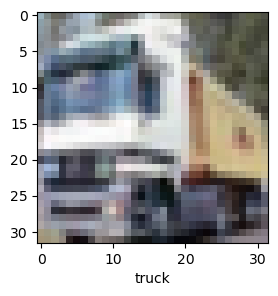

In [485]:
plt.figure(figsize = (30,3))
plt.imshow(X_train_cifar10[1])
plt.xlabel(classes[ y_train_cifar10[1]])

In [486]:
X_train_cifar10 = X_train_cifar10 / 255.0
X_test_cifar10 = X_test_cifar10 / 255.0

Text(0.5, 0, 'truck')

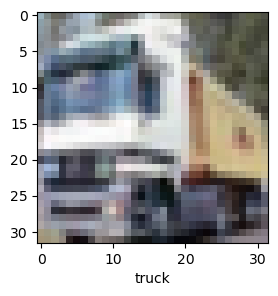

In [487]:
plt.figure(figsize = (30,3))
plt.imshow(X_train_cifar10[1])
plt.xlabel(classes[ y_train_cifar10[1]])

In [488]:
X_train_cifar10.shape

(50000, 32, 32, 3)

In [489]:
X_train_cifar10_flattened = X_train_cifar10.reshape(len(X_train_cifar10), 32*32*3)
X_test_cifar10_flattened  = X_test_cifar10.reshape(len(X_test_cifar10), 32*32*3)

# Transformaciones de PCA

## MNIST

In [490]:
s_mnist = np.cov(X_train_mnist_flattened.transpose(), ddof=1)
print(s_mnist)

[[1.31736554e-07 1.14758391e-07 1.14459424e-07 ... 7.92262339e-08
  8.52732398e-08 9.62716545e-08]
 [1.14758391e-07 9.53749891e-07 1.65491957e-06 ... 2.39370959e-06
  1.03290380e-06 1.63889309e-07]
 [1.14459424e-07 1.65491957e-06 9.06761225e-06 ... 1.06742951e-05
  3.01881361e-06 5.96717771e-07]
 ...
 [7.92262339e-08 2.39370959e-06 1.06742951e-05 ... 4.58073189e-03
  1.57065665e-03 1.32960813e-04]
 [8.52732398e-08 1.03290380e-06 3.01881361e-06 ... 1.57065665e-03
  1.28283423e-03 1.46193336e-04]
 [9.62716545e-08 1.63889309e-07 5.96717771e-07 ... 1.32960813e-04
  1.46193336e-04 6.62678053e-05]]


In [491]:
pca_mnist = PCA(n_components = 60)
pca_mnist.fit(X_train_mnist_flattened)

print("Componentes:")
print(pca_mnist.components_)

print("Varianza explicada:")
print(pca_mnist.explained_variance_)

print("Porcentaje de varianza explicada:")
print(pca_mnist.explained_variance_ratio_)

Componentes:
[[ 1.76521515e-07  2.44768364e-06  1.67354171e-05 ...  1.06623293e-03
   1.14054578e-04  1.30759064e-05]
 [-2.00777633e-07  3.25916172e-06  7.20161624e-06 ...  2.38633309e-03
   7.40179648e-04  6.89874688e-05]
 [ 5.67039716e-07 -5.64584997e-07  1.13361831e-05 ... -5.54570529e-04
  -9.14299655e-04 -7.12402066e-05]
 ...
 [-2.99398682e-06 -4.80257857e-05 -9.89938490e-05 ... -6.30318466e-03
  -2.18266552e-03 -3.10320514e-04]
 [ 4.69111850e-06  1.27504746e-05  1.11126670e-04 ... -1.74628010e-02
  -8.04324765e-03 -6.99839982e-04]
 [ 2.28922386e-06 -3.05973712e-05 -1.15159740e-04 ... -1.56108160e-02
  -1.74668815e-03  1.01732384e-05]]
Varianza explicada:
[19.80980567 12.11221047  4.10615661  3.38182839  2.62477022  2.36084678
  1.59744034  1.2998236   0.92082807  0.89655881  0.6773136   0.62299873
  0.52240376  0.45003398  0.41465993  0.40236086  0.37651521  0.35780014
  0.31248952  0.31074029  0.29584764  0.27771129  0.2624719   0.25414487
  0.24633758  0.23920853  0.22732845  0

Varianza explicada acumulada:
 [0.29039228 0.46794538 0.5281376  0.57771188 0.61618843 0.65079612
 0.67421303 0.69326717 0.7067656  0.71990827 0.72983702 0.73896957
 0.7466275  0.75322455 0.75930306 0.76520127 0.77072062 0.77596562
 0.7805464  0.78510155 0.78943839 0.79350936 0.79735694 0.80108246
 0.80469352 0.80820008 0.8115325  0.81472609 0.81780672 0.82073945
 0.82349548 0.82614609 0.82878313 0.83134148 0.83380358 0.83616259
 0.83846548 0.8407207  0.84290546 0.84499868 0.8470015  0.84895884
 0.85090564 0.85273341 0.85448683 0.85620579 0.85789338 0.85953295
 0.8611412  0.86268847 0.86420923 0.86570847 0.86717465 0.8686023
 0.86998252 0.87134449 0.8726503  0.873927   0.87518843 0.8764331 ]


Text(0.5, 1.0, 'Número de componentes vs porcentaje de varianza explicada MNIST')

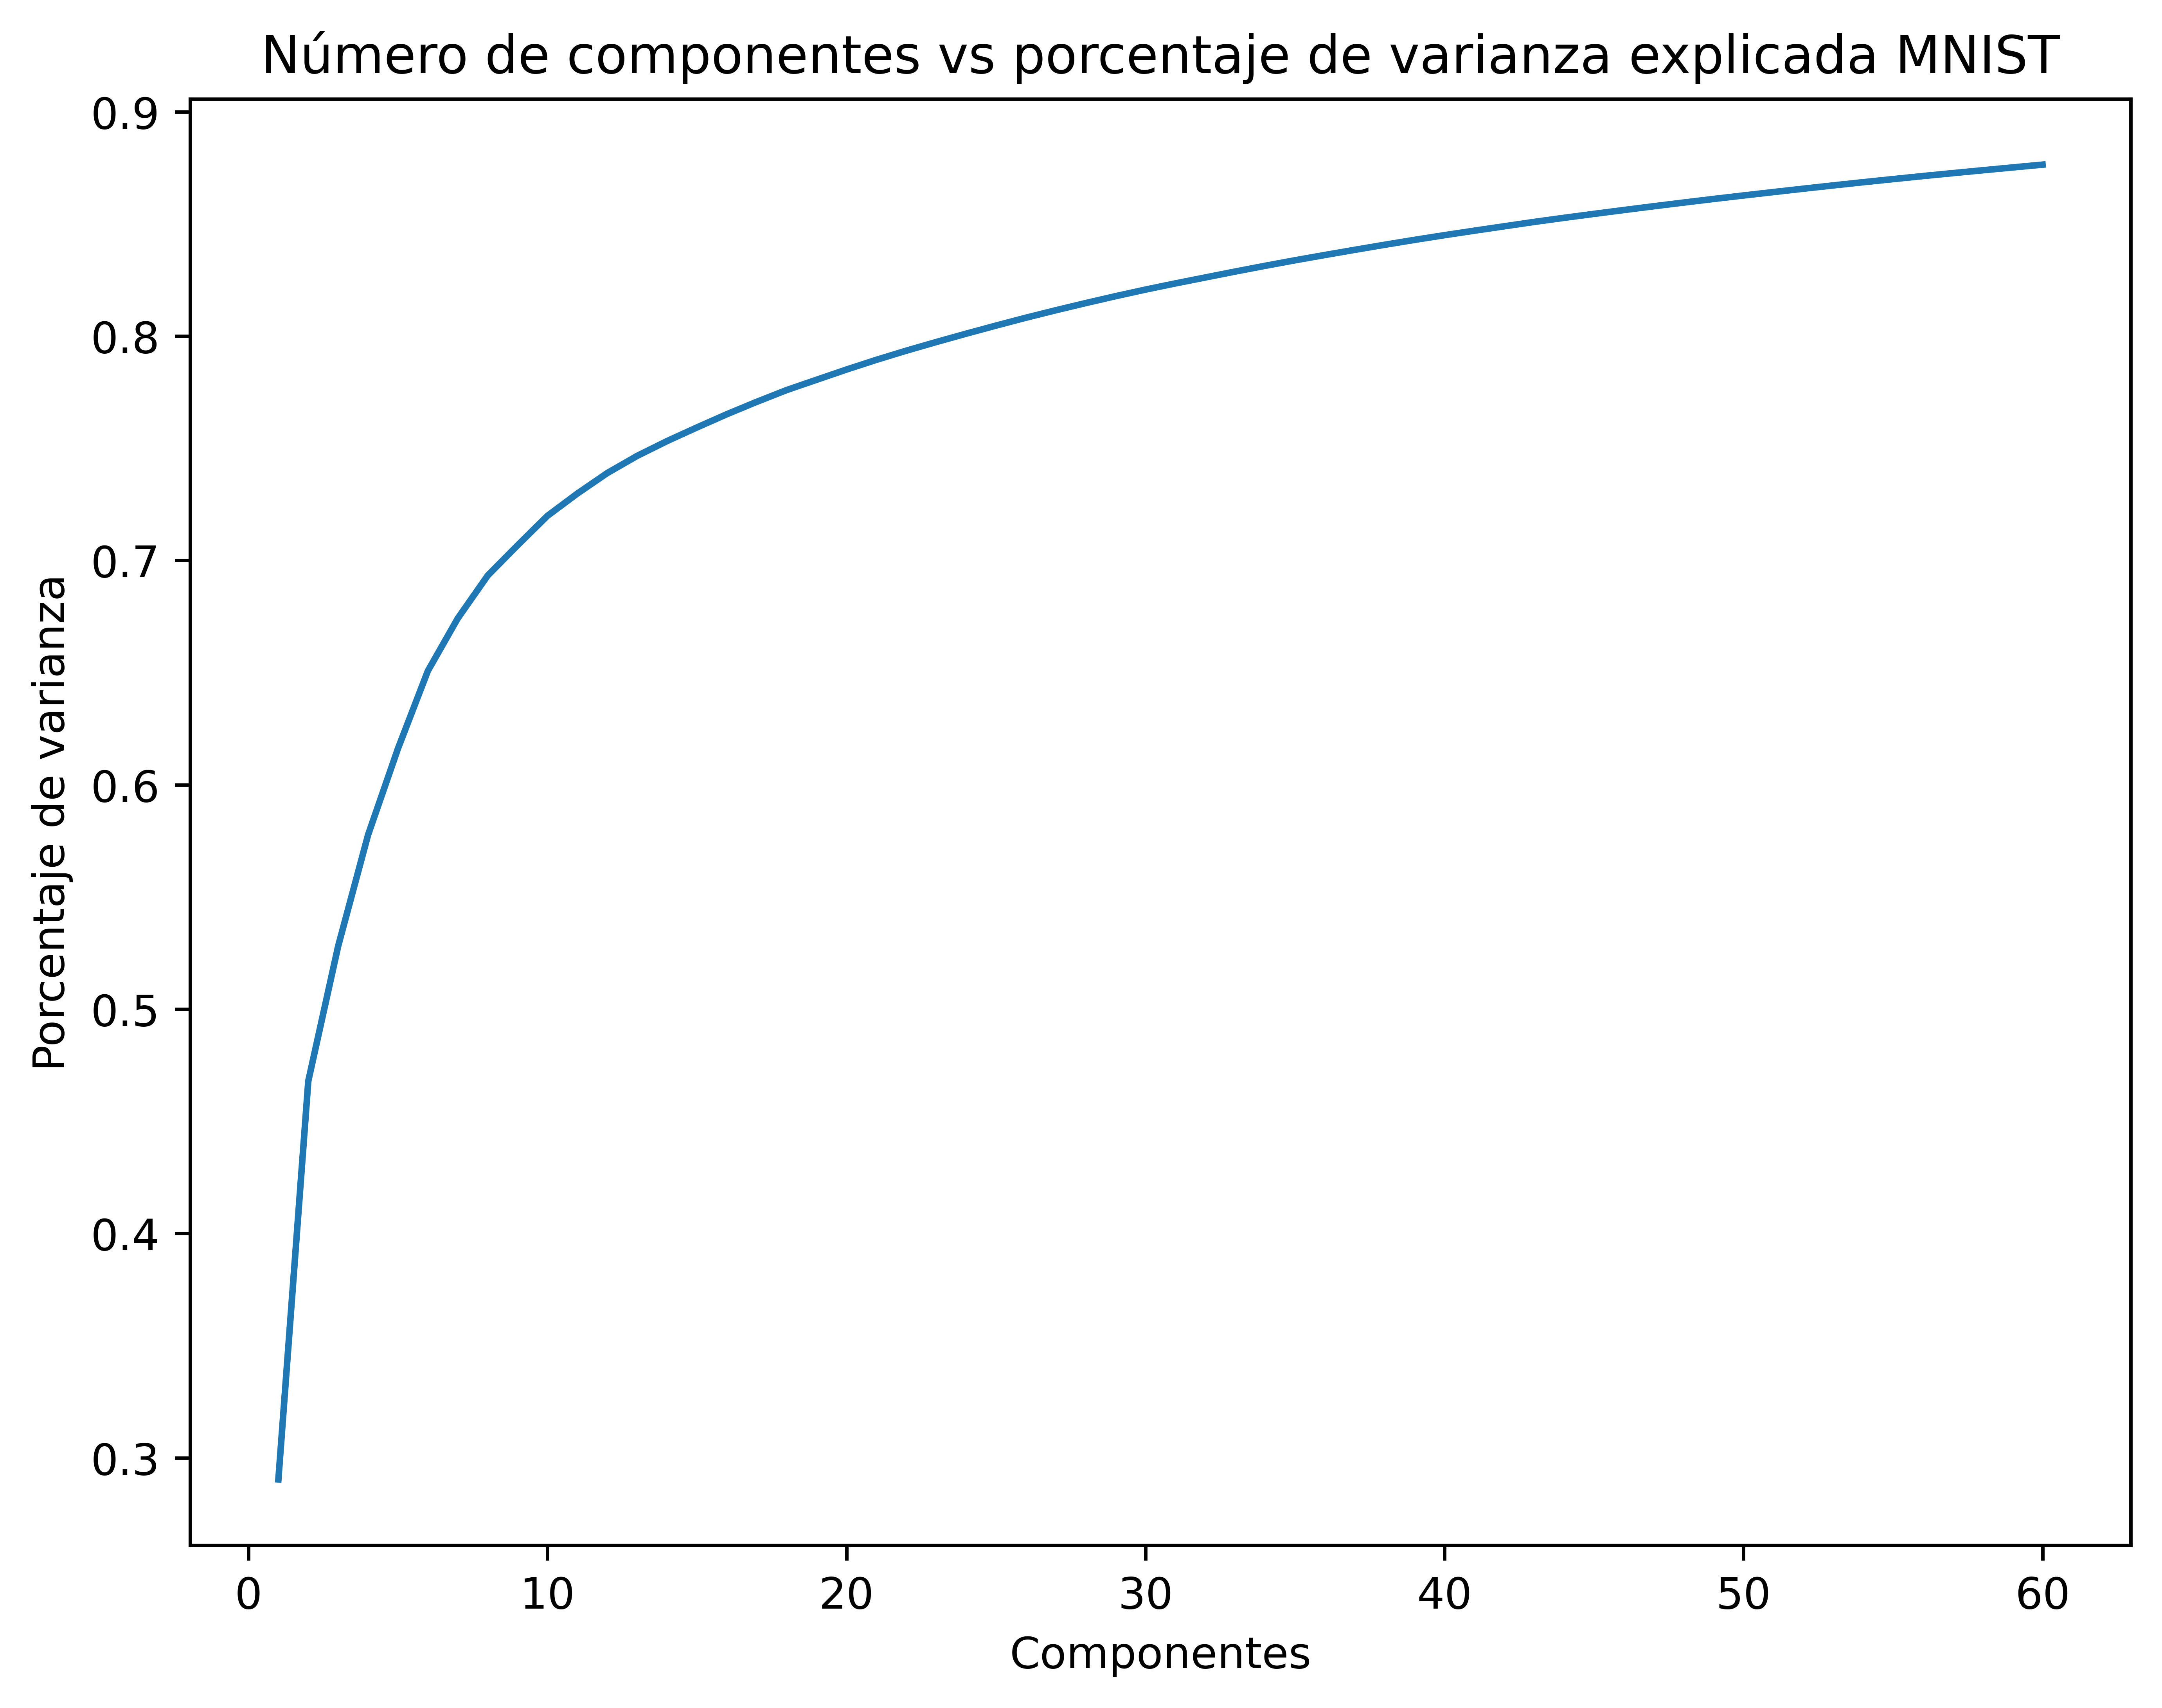

In [621]:
cumulative_variance_mnist = np.cumsum(pca_mnist.explained_variance_ratio_)

print("Varianza explicada acumulada:\n", cumulative_variance_mnist)

plt.figure(figsize=(8, 6),  dpi=800)
plt.plot(np.arange(1, 61, 1), cumulative_variance_mnist)
plt.xlabel("Componentes")
plt.ylabel("Porcentaje de varianza")
plt.title("Número de componentes vs porcentaje de varianza explicada MNIST")

In [493]:
pca_mnist = PCA(n_components = 60)
pca_mnist.fit(X_train_mnist_flattened)

X_train_mnist_pca  = pca_mnist.transform(X_train_mnist_flattened)
X_test_mnist_pca = pca_mnist.transform(X_test_mnist_flattened)

print("Nuevas variables:\n", X_train_mnist_pca)

Nuevas variables:
 [[-4.86250160e-01  6.40421332e+00 -4.74918114e+00 ... -1.99074183e-02
   2.15900575e-01 -2.34591195e-01]
 [ 5.52128962e+00 -1.77114249e+00 -1.02363543e+00 ... -1.79763092e-01
  -2.10621739e-01  3.76981009e-03]
 [-2.84670900e+00 -4.32093387e+00  4.16291147e-01 ...  1.05596594e-01
   6.81720517e-02  1.70943314e-01]
 ...
 [ 3.36372626e+00 -4.62839288e+00 -2.04193723e+00 ... -4.02853562e-01
  -2.56612739e-01 -4.97517958e-01]
 [-3.16657461e+00 -2.27928970e+00  1.88360748e+00 ... -1.94835658e-02
  -1.44906027e-01 -1.08116122e-01]
 [-7.12025023e+00 -4.69581736e-01  1.83887764e+00 ... -1.03676332e-01
   1.60547427e-02 -3.19586749e-02]]


In [494]:
X_train_mnist_pca.shape

(60000, 60)

In [495]:
pca_mnist.components_.shape

(60, 784)

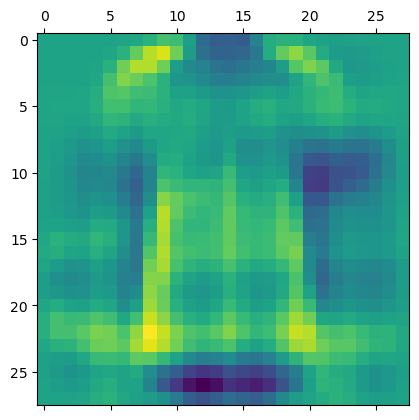

In [496]:
foto1=pca_mnist.components_[10]
foto1=foto1.reshape((28,28))
plt.matshow(foto1)

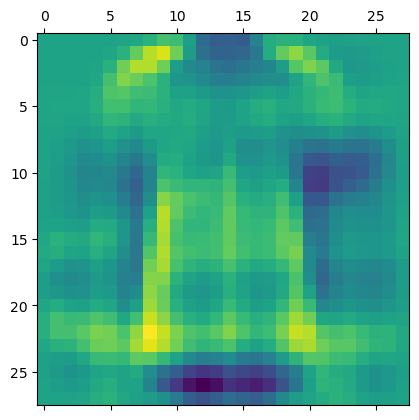

In [497]:
plt.matshow(foto1)

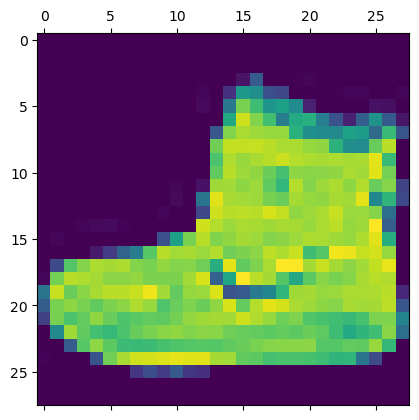

In [498]:
plt.matshow(X_train_mnist[0])

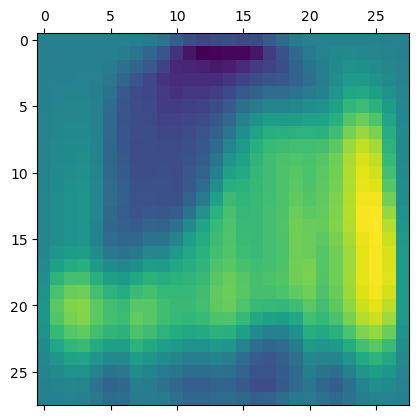

In [499]:
# tres componentes
foto= pca_mnist.components_[0].reshape((28,28))*X_train_mnist_pca[0][0] +pca_mnist.components_[1].reshape((28,28))*X_train_mnist_pca[0][1] +pca_mnist.components_[2].reshape((28,28))*X_train_mnist_pca[0][2]
plt.matshow(foto)
#foto.shape

## ADS

In [500]:
s_ads = np.cov(X_train_ads.transpose(), ddof=1)
print(s_ads)

[[ 3.47520196e-03 -3.95081989e-05 -1.97540995e-05 ... -4.10277450e-05
  -3.34300145e-05 -6.07818445e-06]
 [-3.95081989e-05  1.12055129e-02 -6.42008232e-05 ... -1.33340171e-04
  -1.08647547e-04 -1.97540995e-05]
 [-1.97540995e-05 -6.42008232e-05  5.63485687e-03 ... -6.66700856e-05
  -5.43237735e-05 -9.87704973e-06]
 ...
 [-4.10277450e-05 -1.33340171e-04 -6.66700856e-05 ...  1.16313657e-02
   5.11821119e-03 -2.05138725e-05]
 [-3.34300145e-05 -1.08647547e-04 -5.43237735e-05 ...  5.11821119e-03
   9.49830286e-03  8.55124574e-04]
 [-6.07818445e-06 -1.97540995e-05 -9.87704973e-06 ... -2.05138725e-05
   8.55124574e-04  1.74064007e-03]]


In [501]:
pca_ads = PCA(n_components = 200)
pca_ads.fit(X_train_ads)

print("Componentes:")
print(pca_ads.components_)

print("Varianza explicada:")
print(pca_ads.explained_variance_)

print("Porcentaje de varianza explicada:")
print(pca_ads.explained_variance_ratio_)

Componentes:
[[-0.00129345 -0.00523166 -0.00227597 ...  0.00179313  0.00363812
   0.00132775]
 [-0.00146315 -0.00510819 -0.00209473 ...  0.02959506  0.01345467
   0.00059215]
 [ 0.00261351 -0.00860447  0.00569702 ...  0.00155484 -0.00148664
  -0.00021758]
 ...
 [-0.02030505  0.01561155 -0.0225424  ...  0.03524516 -0.0631233
  -0.01349176]
 [-0.00139149 -0.00369898 -0.00187063 ...  0.01510223 -0.02986796
   0.01818253]
 [ 0.01370834 -0.00184823  0.00061066 ...  0.01455402  0.06498384
   0.05481549]]
Varianza explicada:
[0.99282399 0.51090191 0.37115601 0.31720529 0.26886556 0.23446462
 0.22739396 0.19543779 0.17867942 0.17006159 0.16621202 0.15551239
 0.1430208  0.12860901 0.12684995 0.12628897 0.1223745  0.1144806
 0.10747925 0.10430617 0.10280209 0.09923476 0.09728229 0.09585728
 0.09454507 0.09228376 0.09133644 0.08937314 0.08887101 0.08733584
 0.08673901 0.08568708 0.08415209 0.07801395 0.07270852 0.0705803
 0.06973081 0.06801754 0.06465569 0.06307883 0.06194997 0.0602513
 0.0577710

Varianza explicada acumulada:
 [0.08660948 0.13117825 0.16355622 0.19122778 0.2146824  0.23513603
 0.25497285 0.27202196 0.28760915 0.30244455 0.31694414 0.33051033
 0.34298682 0.35420609 0.36527191 0.37628879 0.38696418 0.39695095
 0.40632696 0.41542616 0.42439415 0.43305094 0.44153741 0.44989956
 0.45814725 0.46619766 0.47416544 0.48196195 0.48971466 0.49733344
 0.50490016 0.51237511 0.51971616 0.52652175 0.53286451 0.53902162
 0.54510462 0.55103816 0.55667843 0.56218114 0.56758538 0.57284143
 0.57788112 0.58283082 0.58761758 0.5923389  0.59704196 0.60161678
 0.60605624 0.61044972 0.614811   0.61913462 0.6234379  0.62770205
 0.63189982 0.63600921 0.64001989 0.64399602 0.64790056 0.65177149
 0.65562475 0.65942731 0.66316687 0.6667994  0.67040254 0.67398945
 0.67751684 0.68100203 0.68444726 0.68785832 0.69122181 0.69452013
 0.6977865  0.70103865 0.70427076 0.70744856 0.71060707 0.71372676
 0.71681767 0.7198805  0.7229169  0.72591833 0.72889246 0.73185504
 0.73475589 0.73764277 0.740520

Text(0.5, 1.0, 'Número de componentes vs porcentaje de varianza explicada INTERNET ADS')

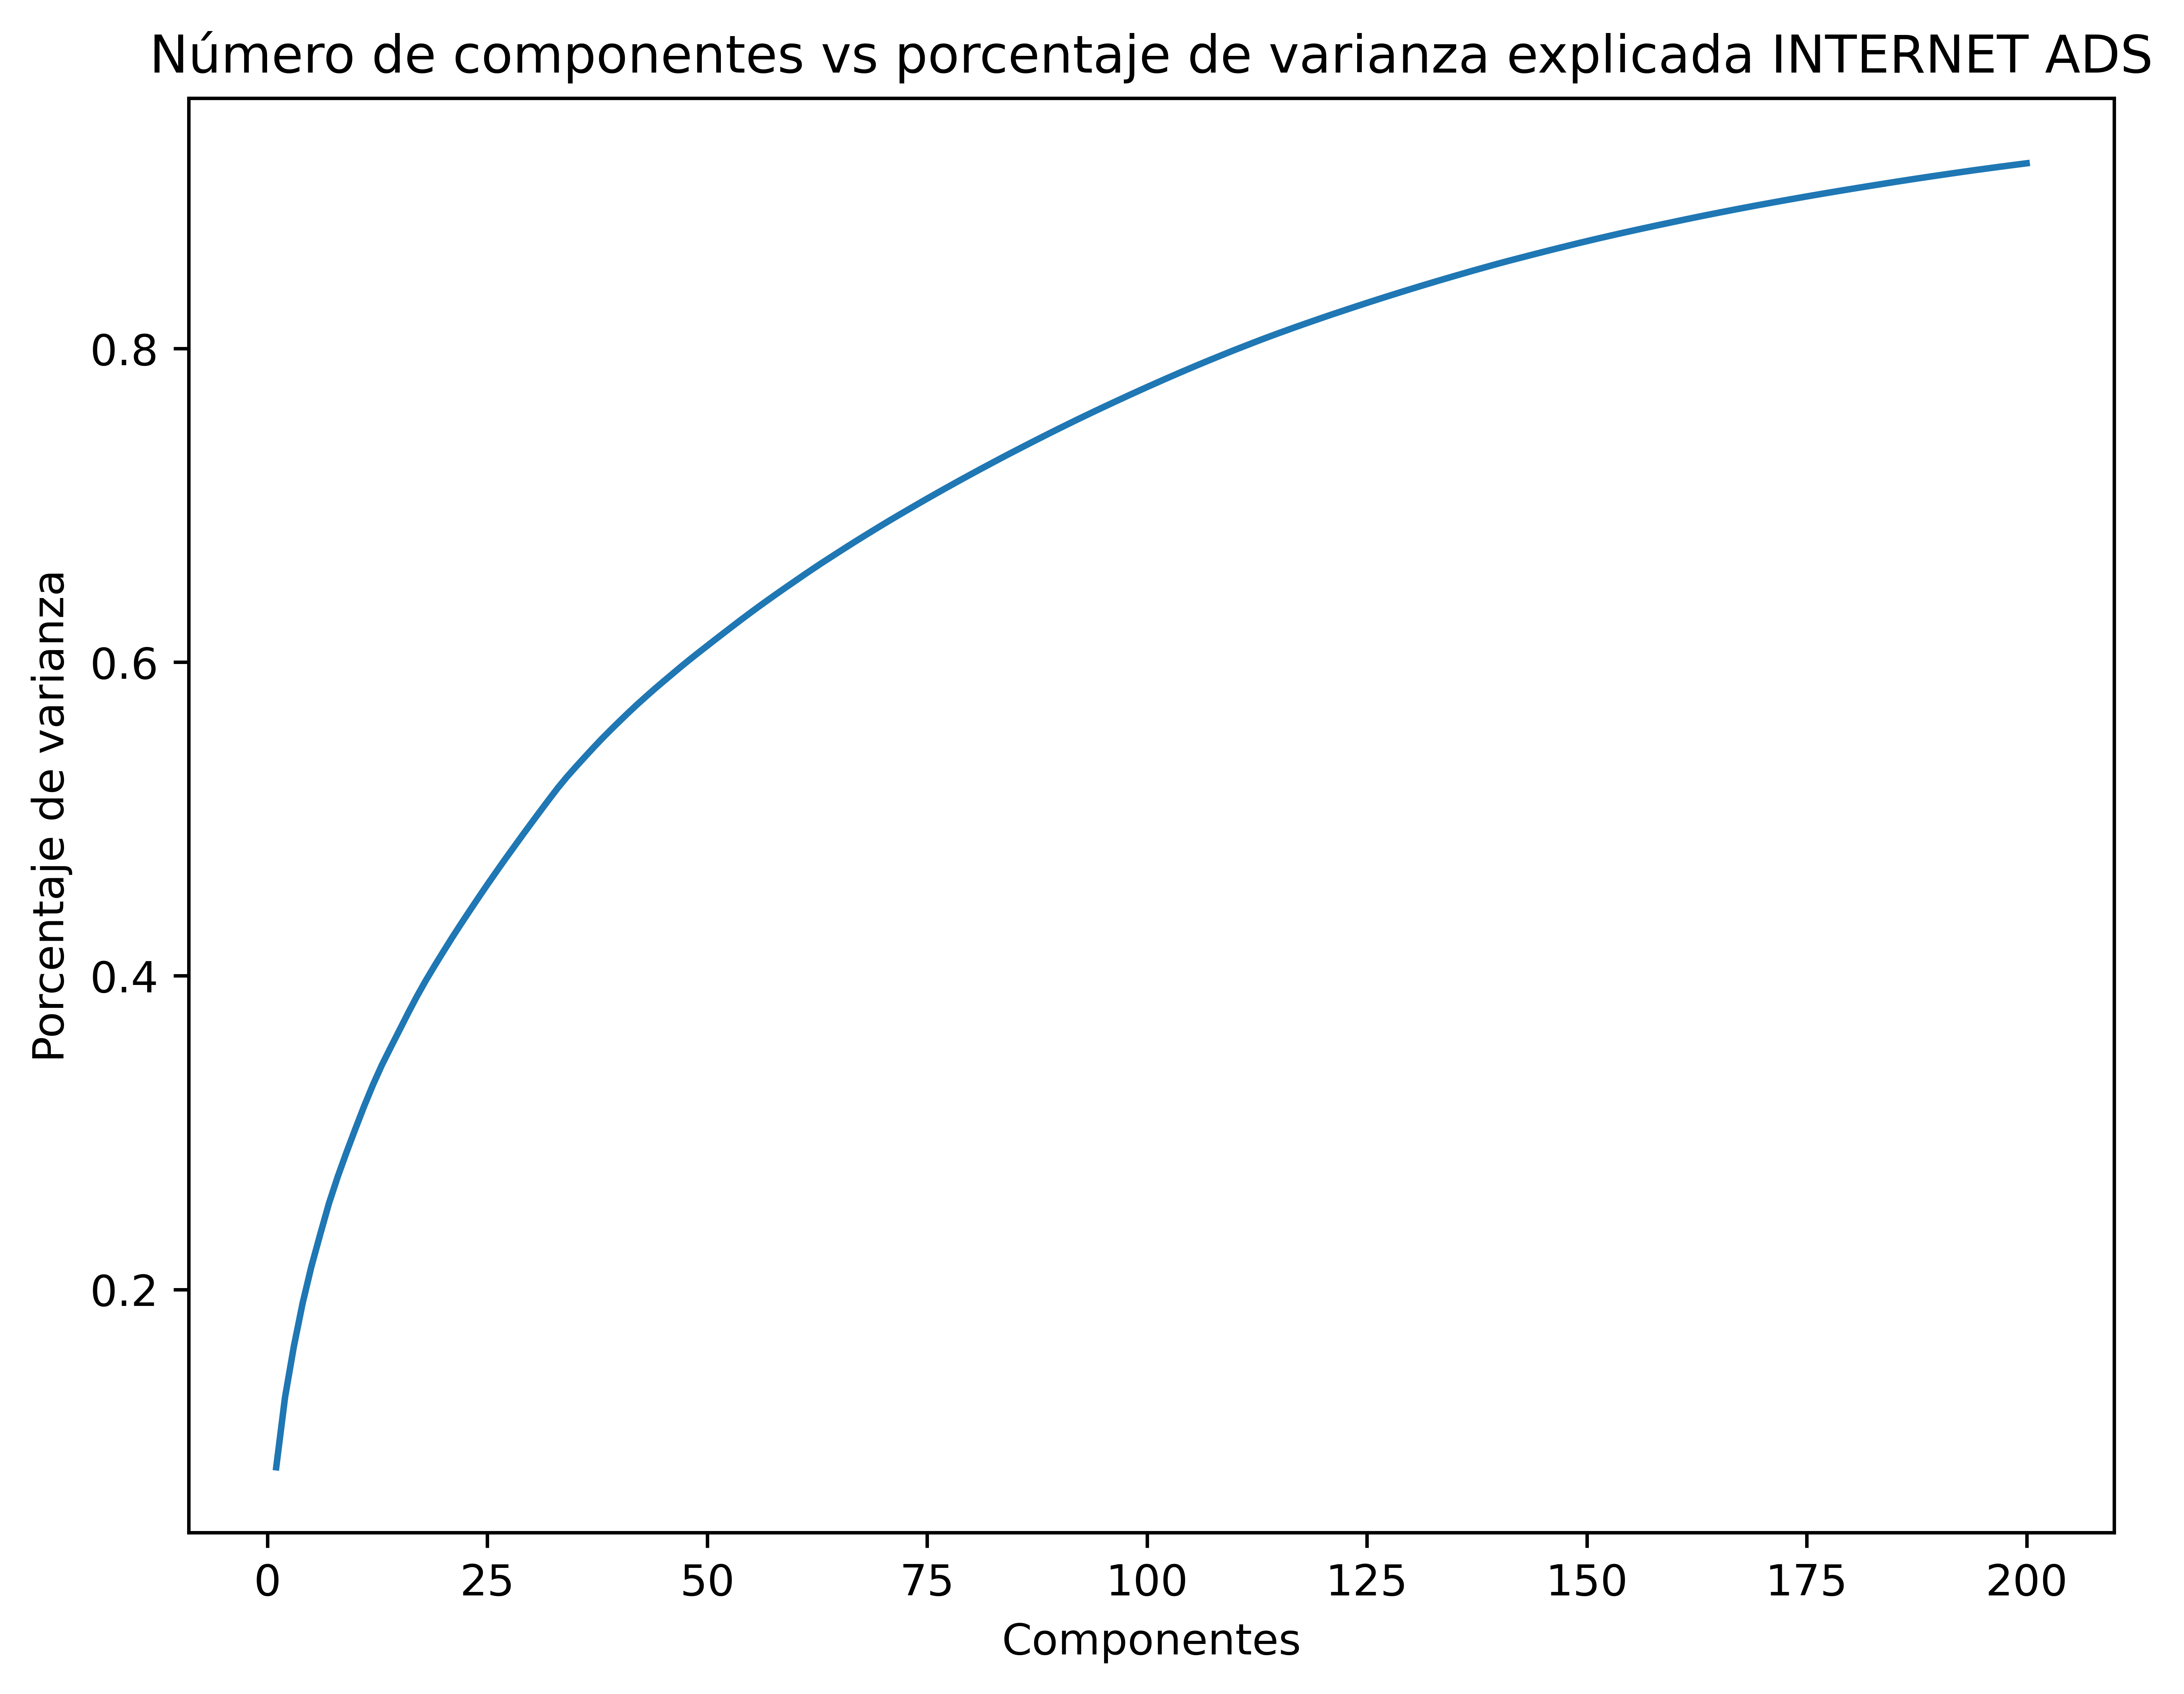

In [622]:
cumulative_variance_ads = np.cumsum(pca_ads.explained_variance_ratio_)

print("Varianza explicada acumulada:\n", cumulative_variance_ads)

plt.figure(figsize=(8, 6),  dpi=800)
plt.plot(np.arange(1, 201, 1), cumulative_variance_ads)
plt.xlabel("Componentes")
plt.ylabel("Porcentaje de varianza")
plt.title("Número de componentes vs porcentaje de varianza explicada INTERNET ADS")

In [503]:
pca_ads = PCA(n_components = 200)
pca_ads.fit(X_train_ads)

X_train_ads_PCA  = pca_ads.transform(X_train_ads)
X_test_ads_PCA= pca_ads.transform(X_test_ads)

print("Nuevas variables:\n", X_train_ads_PCA)

Nuevas variables:
 [[ 1.17138158 -0.02670371 -0.26979682 ...  0.00396425  0.34768623
  -0.17780159]
 [-0.35289774 -0.21387359  0.35732197 ...  0.0421216  -0.16361567
   0.21088542]
 [ 2.90828121  0.21361905  1.13204799 ...  0.00749632 -0.07071537
  -0.00427877]
 ...
 [-0.39460177  0.41330432 -0.07310515 ... -0.05267783 -0.15899165
  -0.02141068]
 [ 0.96347397 -0.07285842 -0.17635907 ...  0.03895588 -0.03134638
  -0.05682336]
 [-0.3903547  -0.21642002  0.37119729 ... -0.01271097  0.00380141
  -0.0110605 ]]


In [504]:
X_train_ads.shape

(2295, 1554)

In [505]:
y_train_ads.shape

(2295,)

## CIFAR10

In [506]:
s_cifar10 = np.cov(X_train_cifar10_flattened.transpose(), ddof=1)
print(s_cifar10)

[[0.08288274 0.07753457 0.07603199 ... 0.02538903 0.02366294 0.02447702]
 [0.07753457 0.08174661 0.08372227 ... 0.02245843 0.02475359 0.02629237]
 [0.07603199 0.08372227 0.09953345 ... 0.02051379 0.02381258 0.03167675]
 ...
 [0.02538903 0.02245843 0.02051379 ... 0.06482772 0.05833172 0.05430811]
 [0.02366294 0.02475359 0.02381258 ... 0.05833172 0.06036037 0.05760547]
 [0.02447702 0.02629237 0.03167675 ... 0.05430811 0.05760547 0.06714709]]


In [507]:
pca_cifar10 = PCA(n_components = 60)
pca_cifar10.fit(X_train_cifar10_flattened)

print("Componentes:")
print(pca_cifar10.components_)

print("Varianza explicada:")
print(pca_cifar10.explained_variance_)

print("Porcentaje de varianza explicada:")
print(pca_cifar10.explained_variance_ratio_)

Componentes:
[[ 2.63497536e-02  2.77874311e-02  3.11111942e-02 ...  1.57370411e-02
   1.67214265e-02  1.92037780e-02]
 [-1.58463067e-02 -1.75683434e-02 -2.03150579e-02 ...  2.25478672e-02
   2.14666723e-02  2.05379460e-02]
 [-2.17179124e-02 -1.85846515e-02 -1.29083761e-02 ... -2.58156300e-02
  -2.25557841e-02 -1.69787111e-02]
 ...
 [-2.76929387e-02 -2.76522063e-02 -2.01069394e-02 ... -5.38813734e-05
   9.46056131e-04 -8.48902836e-03]
 [ 2.13814573e-03 -4.80302988e-03 -1.15074635e-02 ... -2.52831025e-02
  -2.09854103e-02 -1.42469523e-02]
 [-7.28633775e-03 -7.28090235e-03 -4.88349779e-03 ... -2.74685746e-02
  -2.78997291e-02 -2.26232481e-02]]
Varianza explicada:
[55.36332259 21.42653484 12.74649095  7.00015712  6.87141308  5.34891071
  5.16566928  4.12638318  3.93117801  2.73802504  2.49537545  2.02967495
  1.99921552  1.91217628  1.74883506  1.55636978  1.40824955  1.36354622
  1.30897951  1.22476696  1.13175968  1.11835205  0.94358458  0.93449204
  0.91480413  0.88705297  0.85938862  0

Varianza explicada acumulada:
 [0.2907663  0.40329774 0.47024188 0.50700646 0.54309489 0.57118719
 0.59831711 0.61998874 0.64063515 0.65501517 0.66812079 0.67878058
 0.68928039 0.69932308 0.7085079  0.7166819  0.72407798 0.73123928
 0.73811399 0.74454643 0.75049039 0.75636394 0.76131961 0.76622753
 0.77103205 0.77569083 0.78020431 0.78464085 0.78864865 0.79258732
 0.79624949 0.79958089 0.80282054 0.805923   0.80899887 0.81191136
 0.81452353 0.81711612 0.81965955 0.82214331 0.82457001 0.82686311
 0.82914475 0.83135988 0.83346215 0.83552922 0.83745345 0.83935601
 0.84120106 0.84301732 0.84479693 0.84653062 0.84824083 0.84993751
 0.85155188 0.85312818 0.85468563 0.85622242 0.85772524 0.8592145 ]


Text(0.5, 1.0, 'Número de componentes vs porcentaje de varianza explicada CIFAR-10')

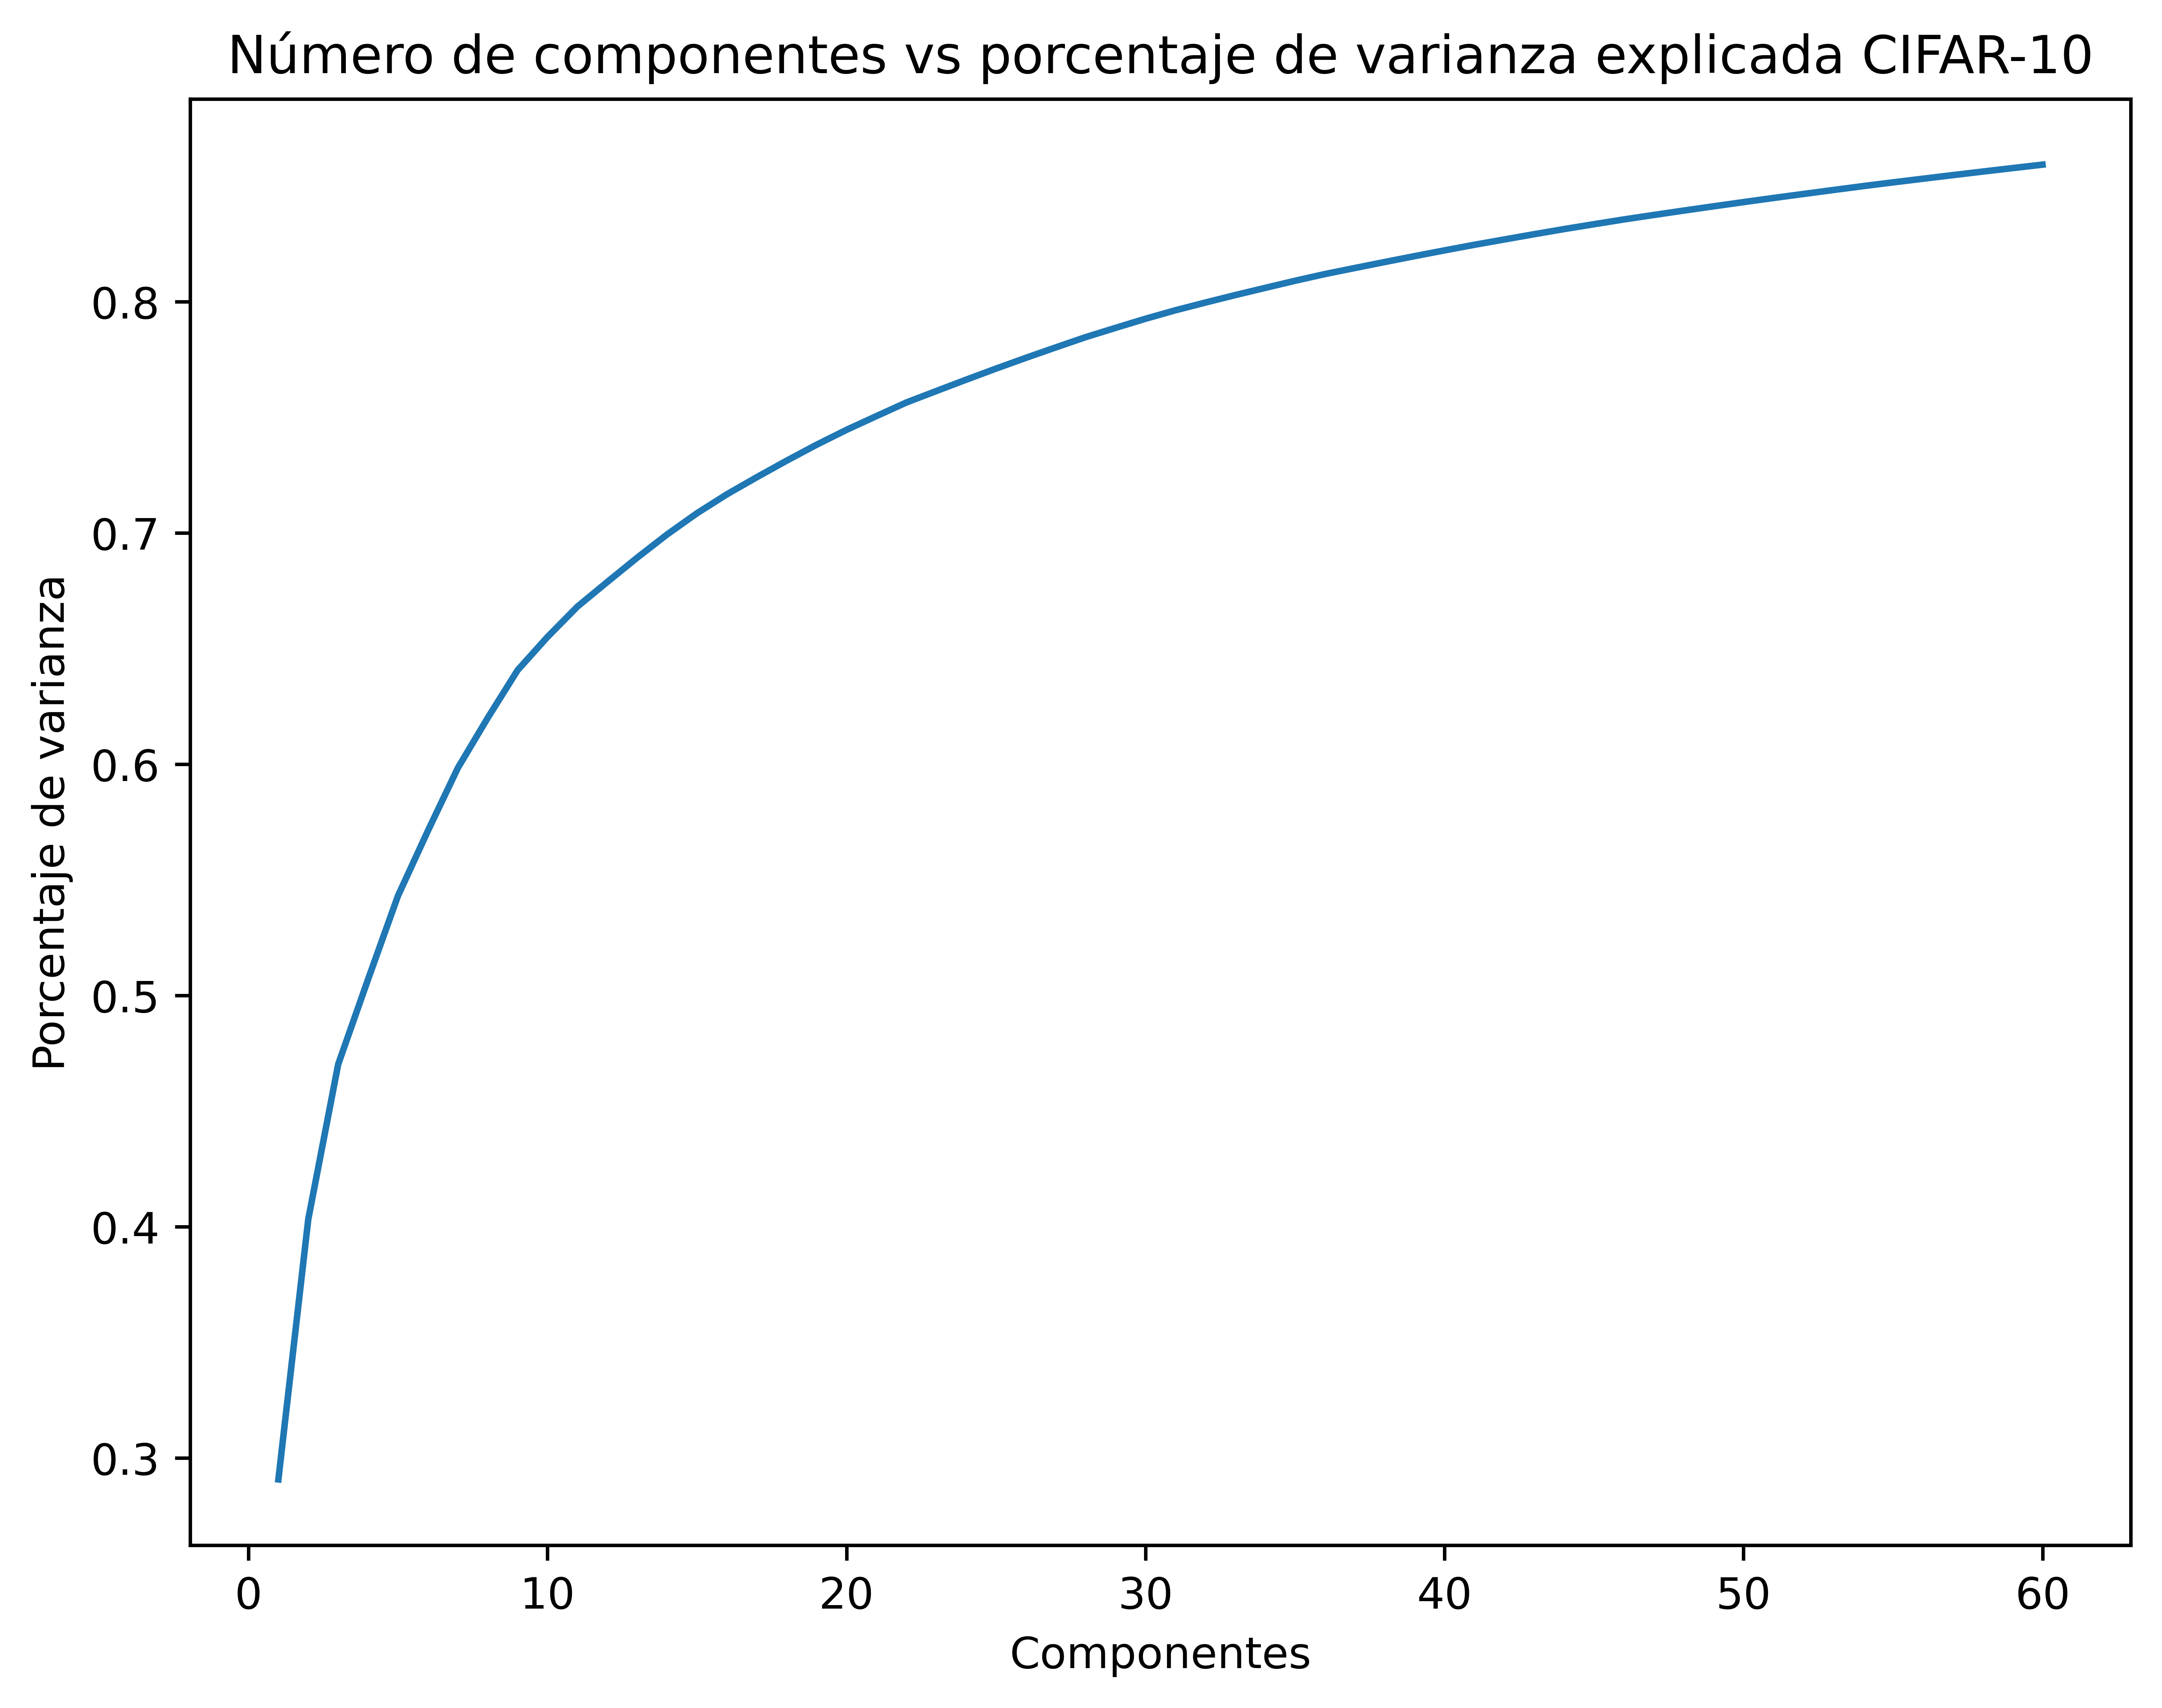

In [623]:
cumulative_variance_cifar10 = np.cumsum(pca_cifar10.explained_variance_ratio_)

print("Varianza explicada acumulada:\n", cumulative_variance_cifar10)

plt.figure(figsize=(8, 6),  dpi=800)
plt.plot(np.arange(1, 61, 1), cumulative_variance_cifar10)
plt.xlabel("Componentes")
plt.ylabel("Porcentaje de varianza")
plt.title("Número de componentes vs porcentaje de varianza explicada CIFAR-10")

In [509]:
pca_cifar10 = PCA(n_components = 60)
pca_cifar10.fit(X_train_cifar10_flattened)

X_train_cifar10_pca  = pca_cifar10.transform(X_train_cifar10_flattened)
X_test_cifar10_pca = pca_cifar10.transform(X_test_cifar10_flattened)

print("Nuevas variables:\n", X_train_cifar10_pca)

Nuevas variables:
 [[ -6.40101763   2.72903876   1.50171052 ...   1.00378646   0.23379112
   -0.13868792]
 [  0.82978338  -0.94994322   6.0037526  ...  -0.07559022   0.14767643
   -1.43217716]
 [  7.73019978 -11.52210233  -2.75362051 ...  -0.89569208  -0.70329412
   -0.92074076]
 ...
 [  0.70734659 -11.34252124  -0.39391488 ...  -0.64942933  -0.87167046
   -0.60865804]
 [ 11.36790901  -3.37597765   5.56619766 ...  -0.47904305   0.21617625
   -0.03167175]
 [  4.19279645  -1.18418848  -4.44596297 ...   0.39567956   0.14698816
   -1.11501373]]


In [510]:
X_train_cifar10_pca.shape

(50000, 60)

In [511]:
pca_cifar10.components_.shape

(60, 3072)

In [512]:
foto1.shape

(28, 28)

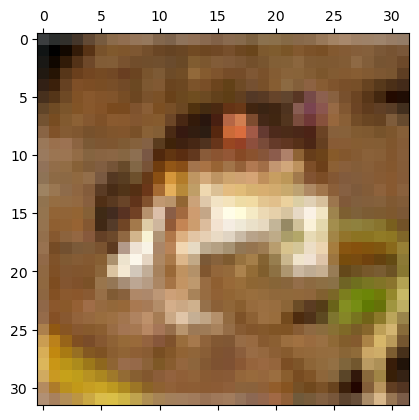

In [513]:
plt.matshow(X_train_cifar10[0])

# Red Neuronal

## FASHION MNIST

In [514]:
start=time.time()
model1_mnist = keras.Sequential([
    keras.layers.Flatten(input_shape=(784,)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  
])

model1_mnist.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1_mnist.fit(X_train_mnist_flattened, y_train_mnist, epochs=5)

end=time.time()
print("Tiempo: "+str(end-start))

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4964 - accuracy: 0.8218
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3692 - accuracy: 0.8630
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3381 - accuracy: 0.8744
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3119 - accuracy: 0.8843
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2947 - accuracy: 0.8913
Tiempo: 12.073220252990723


In [515]:
model1_mnist.evaluate(X_test_mnist_flattened, y_test_mnist)

313/313 [==============================] - 0s 865us/step - loss: 0.3504 - accuracy: 0.8733


[0.3504456579685211, 0.8733000159263611]

313/313 [==============================] - 0s 755us/step


Text(0.5, 1.0, 'CM Fashion-MNIST sin PCA')

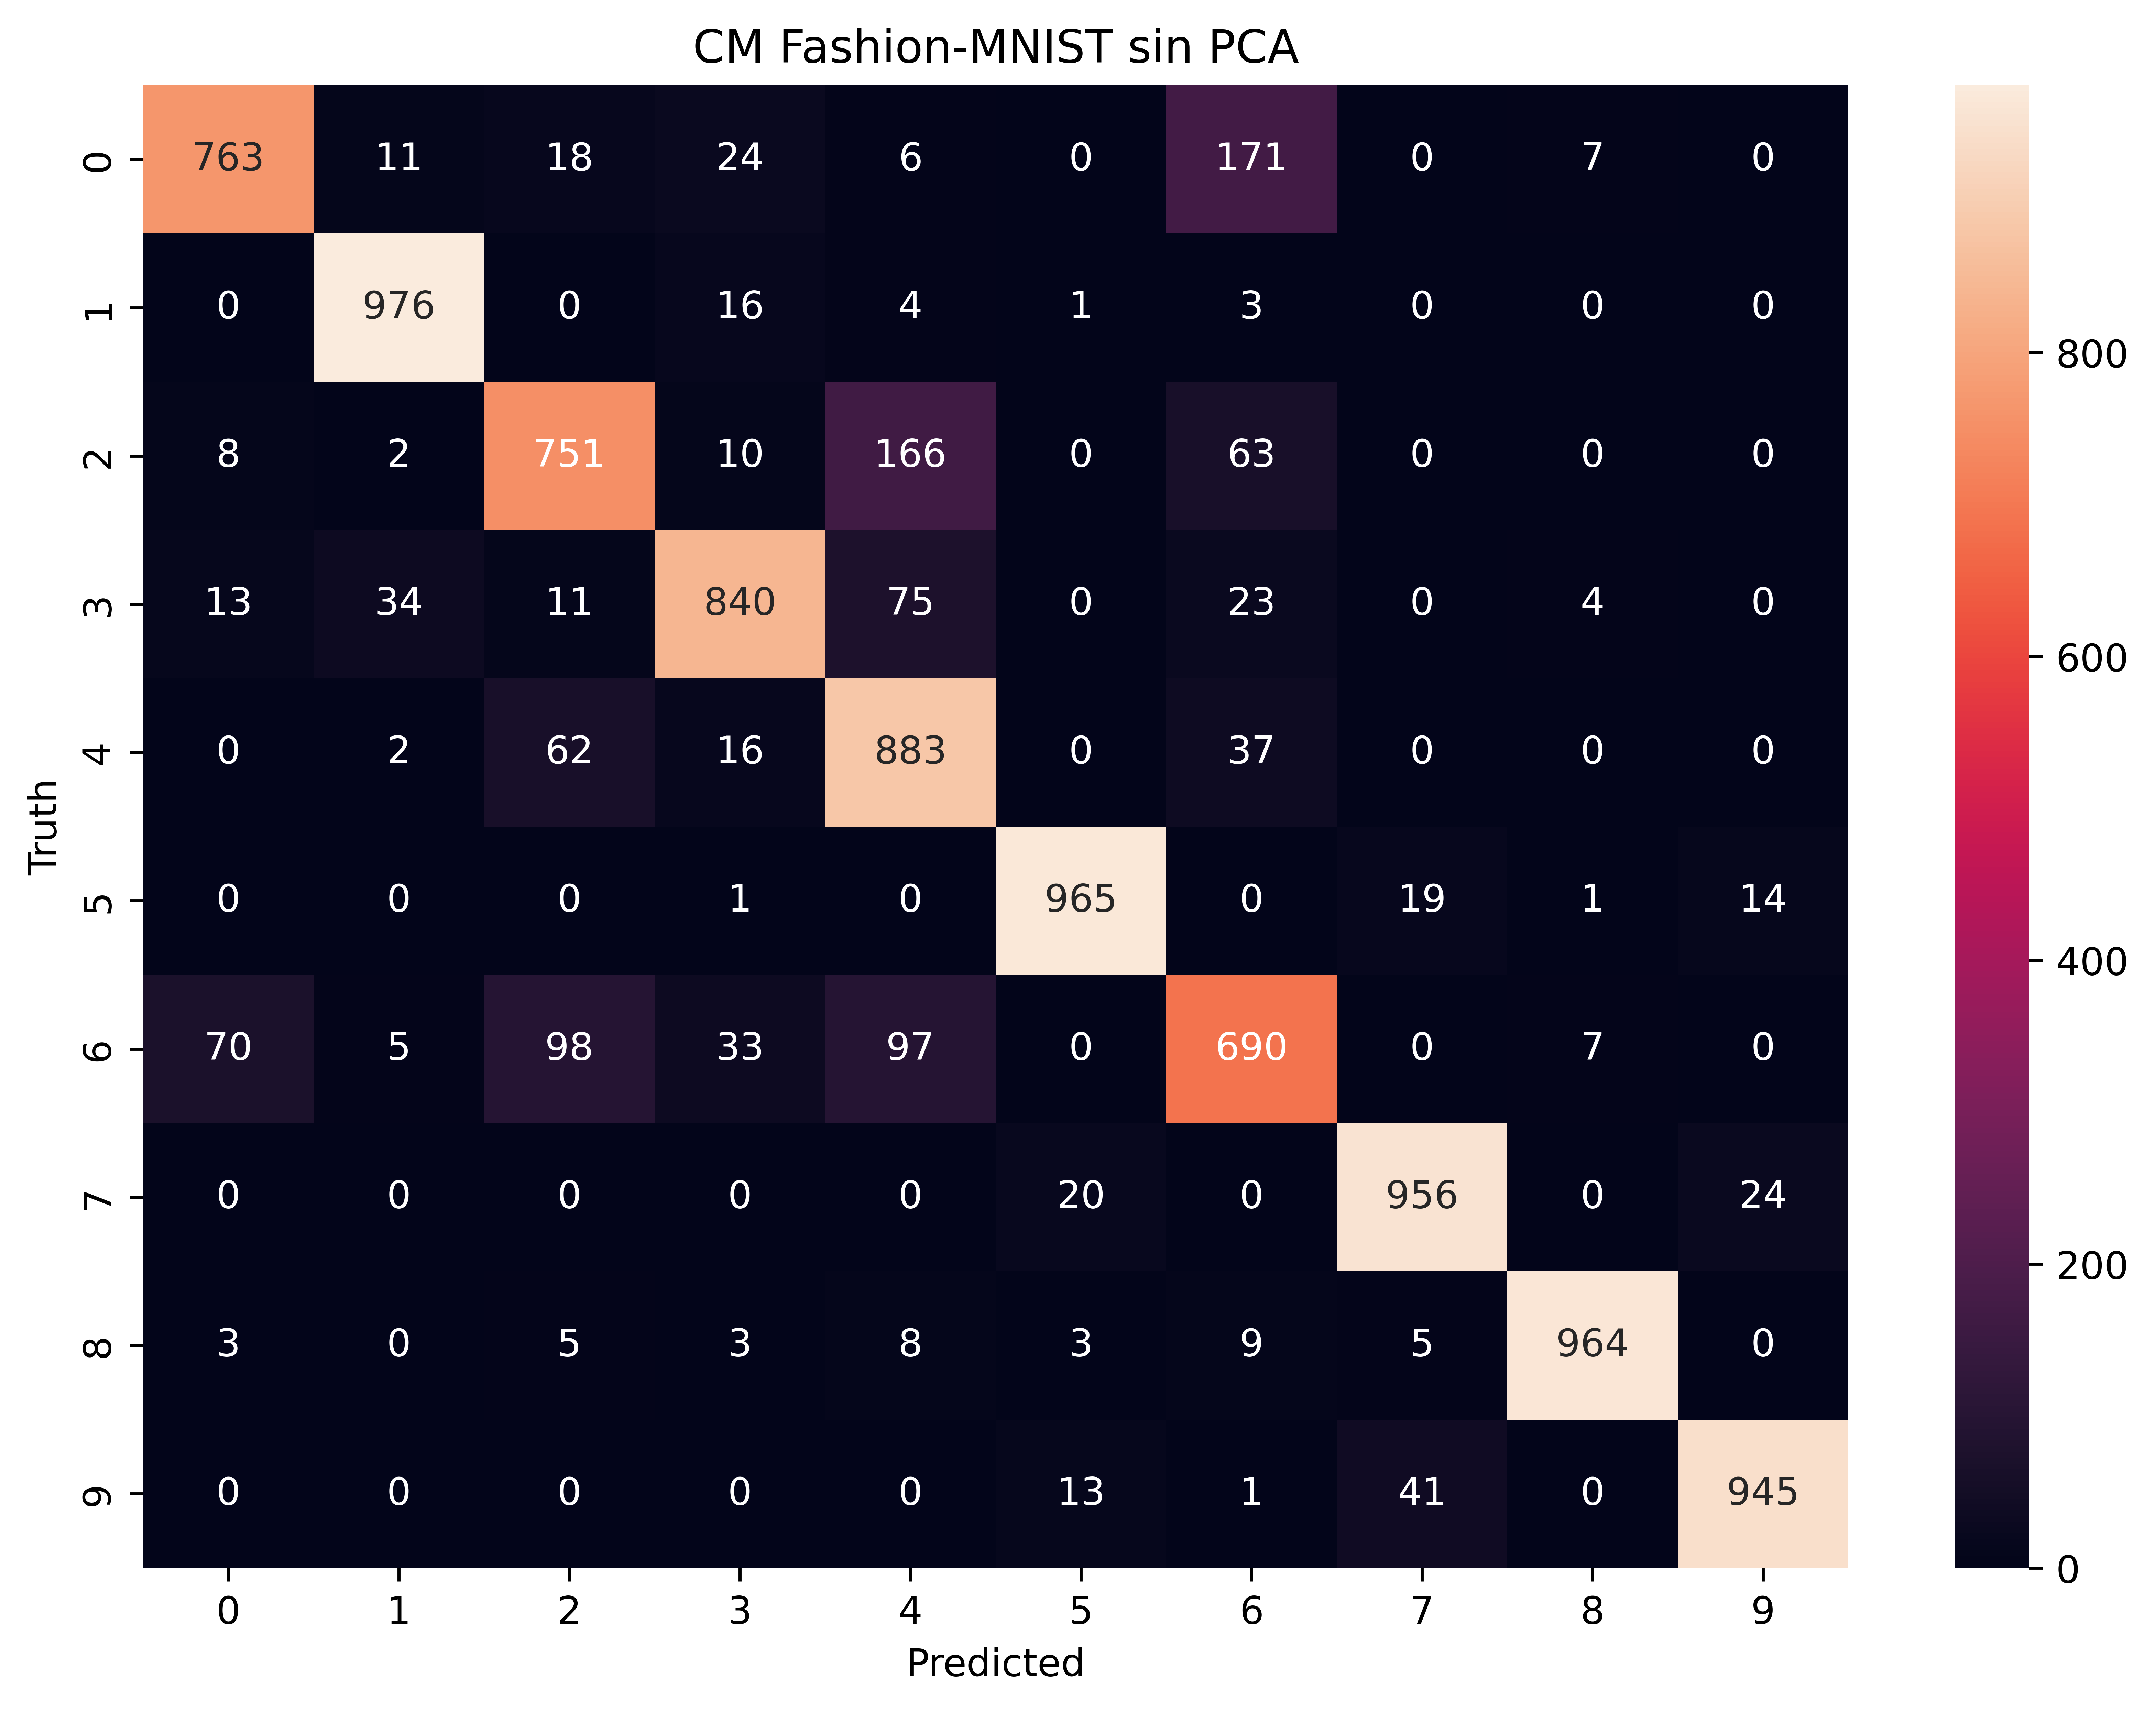

In [624]:
y_predicted_mnist = model1_mnist.predict(X_test_mnist_flattened)
y_predicted_mnist_labels = [np.argmax(i) for i in y_predicted_mnist]
cm_mnist = tf.math.confusion_matrix(labels=y_test_mnist,predictions=y_predicted_mnist_labels)

plt.figure(figsize = (10,7),  dpi=800)
sns.heatmap(cm_mnist, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('CM Fashion-MNIST sin PCA')

In [517]:
start=time.time()
model2_mnist = keras.Sequential([
   keras.layers.Flatten(input_shape=(60,)),
   keras.layers.Dense(100, activation='relu'),
   keras.layers.Dense(100, activation='relu'),
   keras.layers.Dense(100, activation='relu'),
   #keras.layers.Dense(1000, activation='sigmoid'),
   keras.layers.Dense(10, activation='softmax')  
])

model2_mnist.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2_mnist.fit(X_train_mnist_pca, y_train_mnist, epochs=5)

end=time.time()
print("Tiempo: "+str(end-start))

Epoch 1/5
1875/1875 [==============================] - 2s 972us/step - loss: 0.4505 - accuracy: 0.8387
Epoch 2/5
1875/1875 [==============================] - 2s 972us/step - loss: 0.3378 - accuracy: 0.8752
Epoch 3/5
1875/1875 [==============================] - 2s 977us/step - loss: 0.3092 - accuracy: 0.8857
Epoch 4/5
1875/1875 [==============================] - 2s 960us/step - loss: 0.2886 - accuracy: 0.8925
Epoch 5/5
1875/1875 [==============================] - 2s 976us/step - loss: 0.2718 - accuracy: 0.8977
Tiempo: 9.649864196777344


In [518]:
model2_mnist.evaluate(X_test_mnist_pca, y_test_mnist)

313/313 [==============================] - 0s 856us/step - loss: 0.3374 - accuracy: 0.8764


[0.3374181091785431, 0.8763999938964844]

313/313 [==============================] - 0s 690us/step


Text(0.5, 1.0, 'CM Fashion-MNIST con PCA')

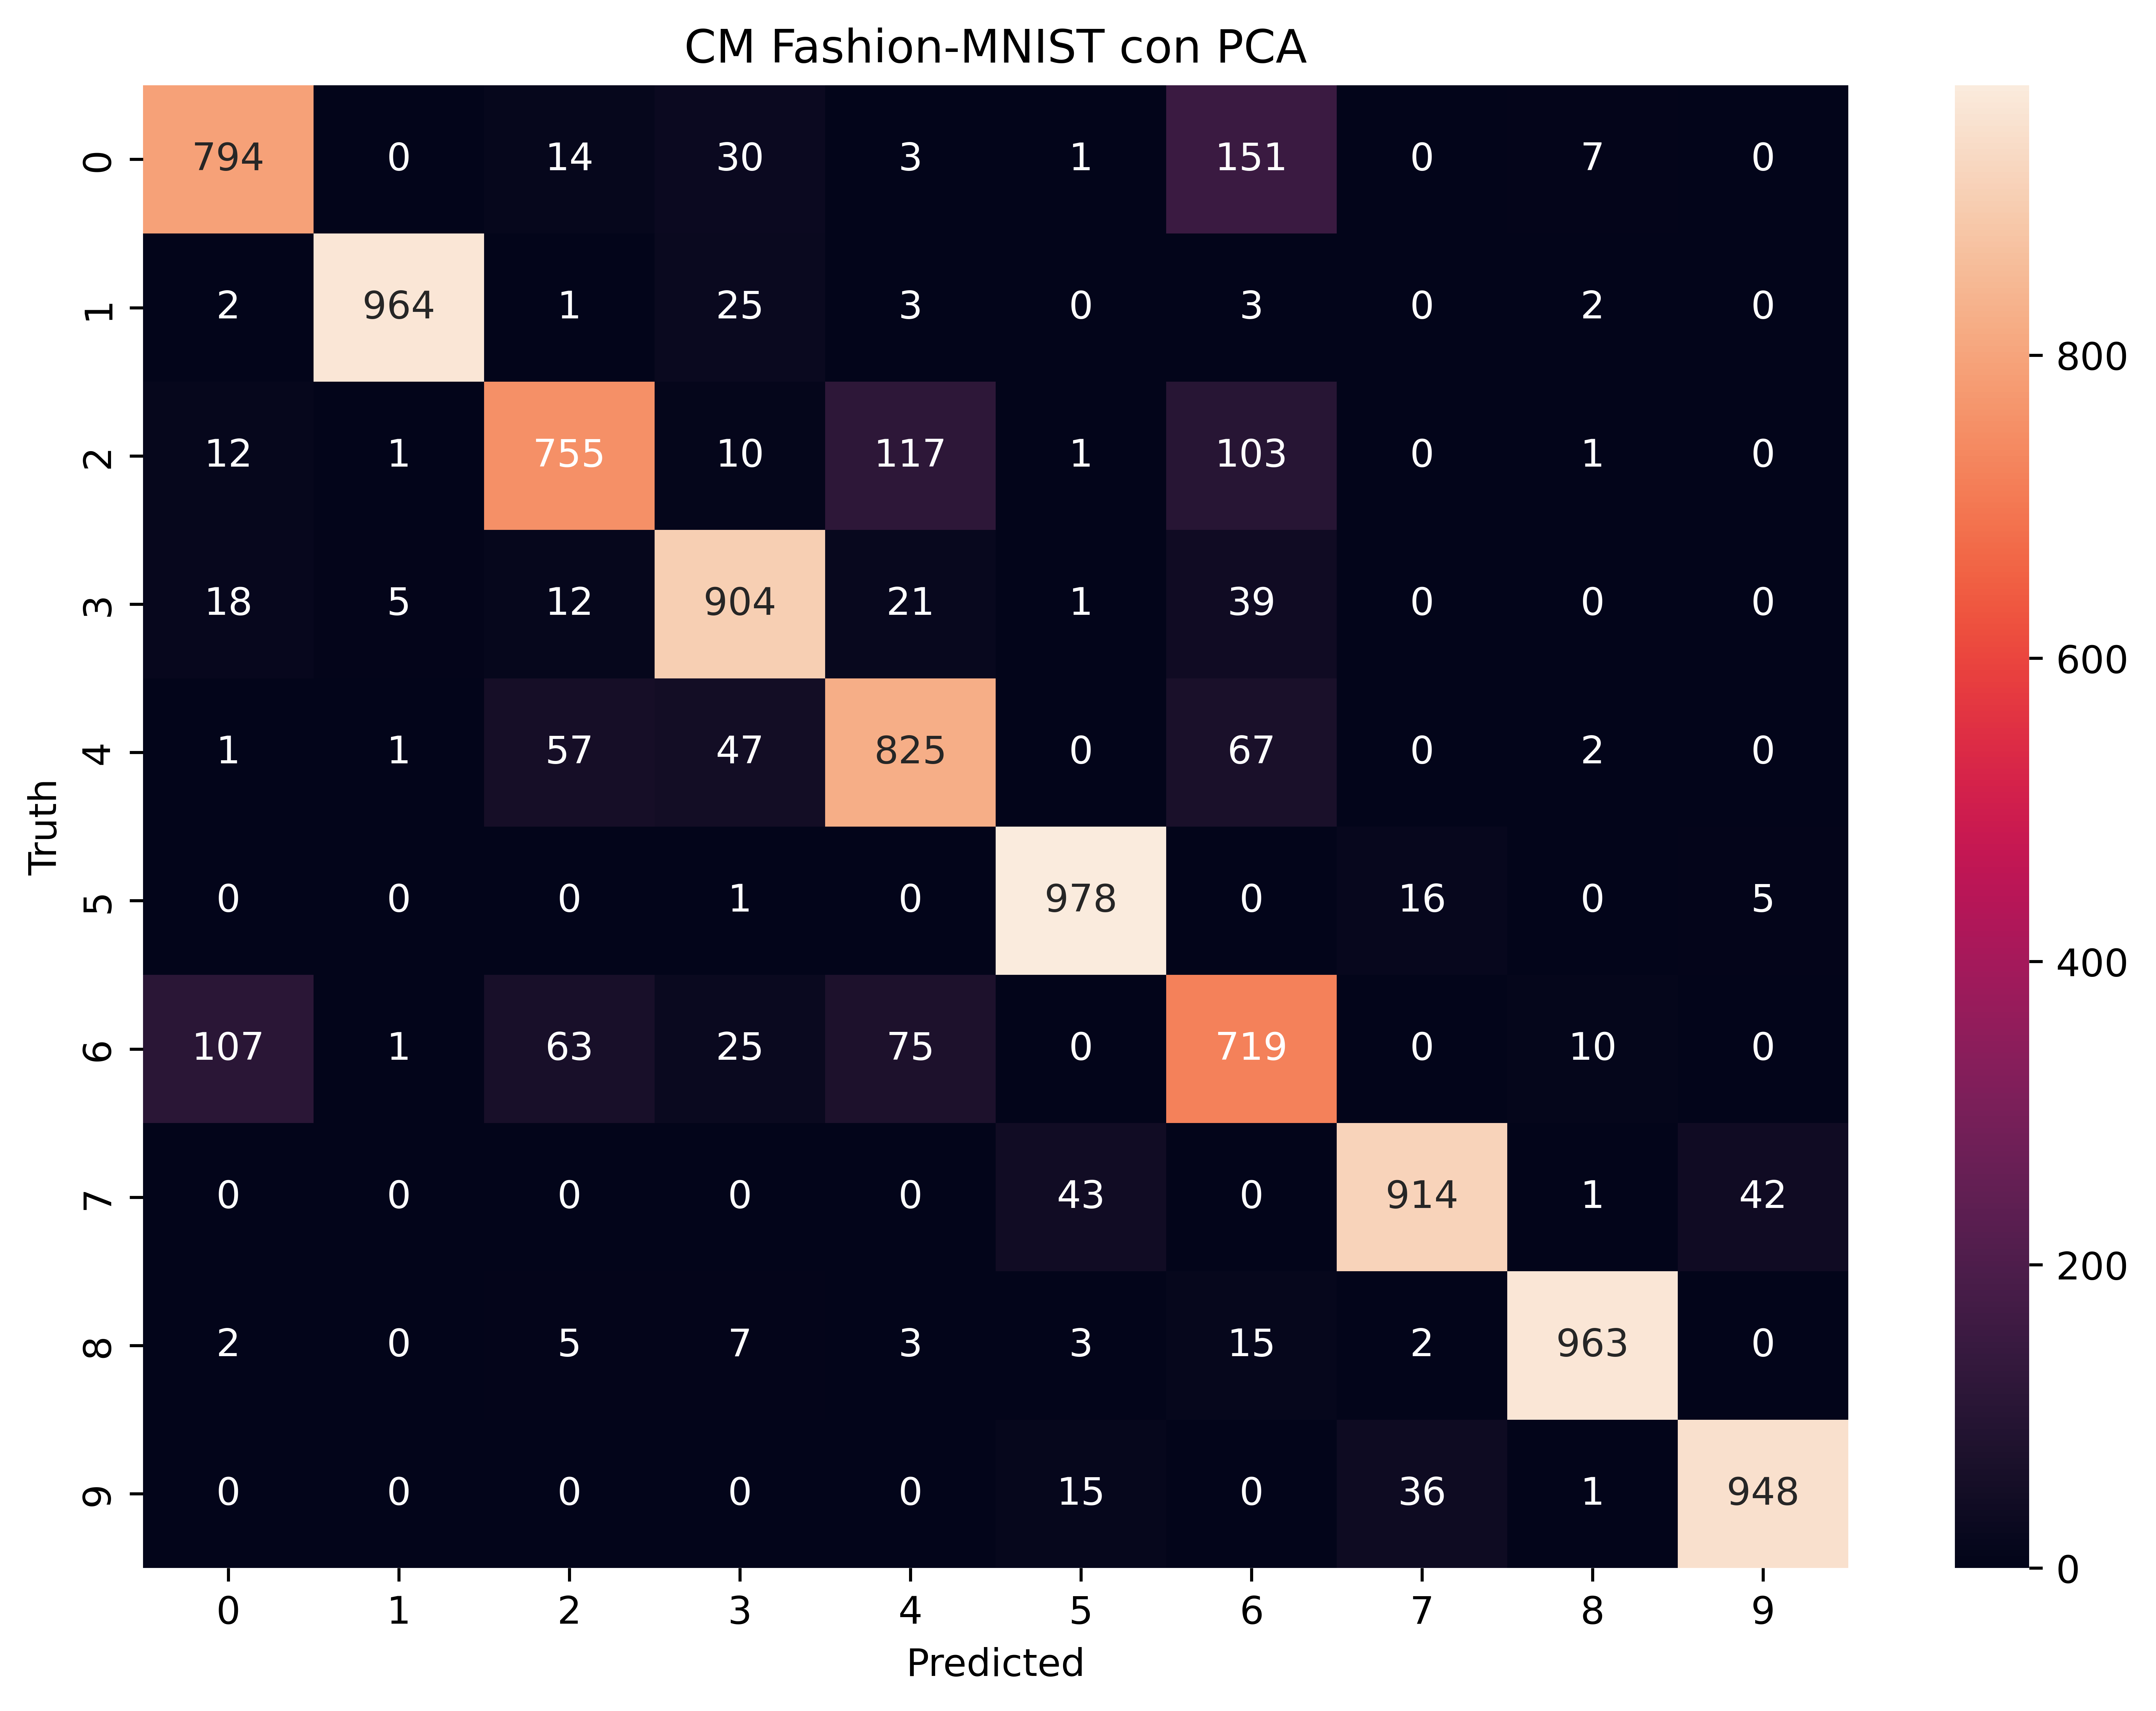

In [625]:
y_predicted_mnist_pca = model2_mnist.predict(X_test_mnist_pca)
y_predicted_mnist_pca_labels = [np.argmax(i) for i in y_predicted_mnist_pca]
cm_mnist_pca = tf.math.confusion_matrix(labels=y_test_mnist,predictions=y_predicted_mnist_pca_labels)

plt.figure(figsize = (10,7),  dpi=800)
sns.heatmap(cm_mnist_pca, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('CM Fashion-MNIST con PCA')

## INTERNET ADS

In [520]:
start=time.time()
model1_ads = keras.Sequential([
    keras.layers.Flatten(input_shape=(1554,)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2, activation='softmax')  
])

model1_ads.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1_ads.fit(X_train_ads, y_train_ads, epochs=5)

end=time.time()
print("Tiempo: "+str(end-start))

Epoch 1/5
72/72 [==============================] - 1s 2ms/step - loss: 0.2855 - accuracy: 0.9063
Epoch 2/5
72/72 [==============================] - 0s 1ms/step - loss: 0.0877 - accuracy: 0.9743
Epoch 3/5
72/72 [==============================] - 0s 2ms/step - loss: 0.0544 - accuracy: 0.9834
Epoch 4/5
72/72 [==============================] - 0s 1ms/step - loss: 0.0397 - accuracy: 0.9869
Epoch 5/5
72/72 [==============================] - 0s 1ms/step - loss: 0.0385 - accuracy: 0.9882
Tiempo: 1.0885584354400635


In [521]:
model1_ads.evaluate(X_test_ads, y_test_ads)

31/31 [==============================] - 0s 1ms/step - loss: 0.1302 - accuracy: 0.9644


[0.13015642762184143, 0.9644308686256409]

31/31 [==============================] - 0s 910us/step


([<matplotlib.axis.YTick at 0x1dc5b1f08d0>,
 [Text(0, 0.5, 'Ad'), Text(0, 1.5, 'no Ad')])

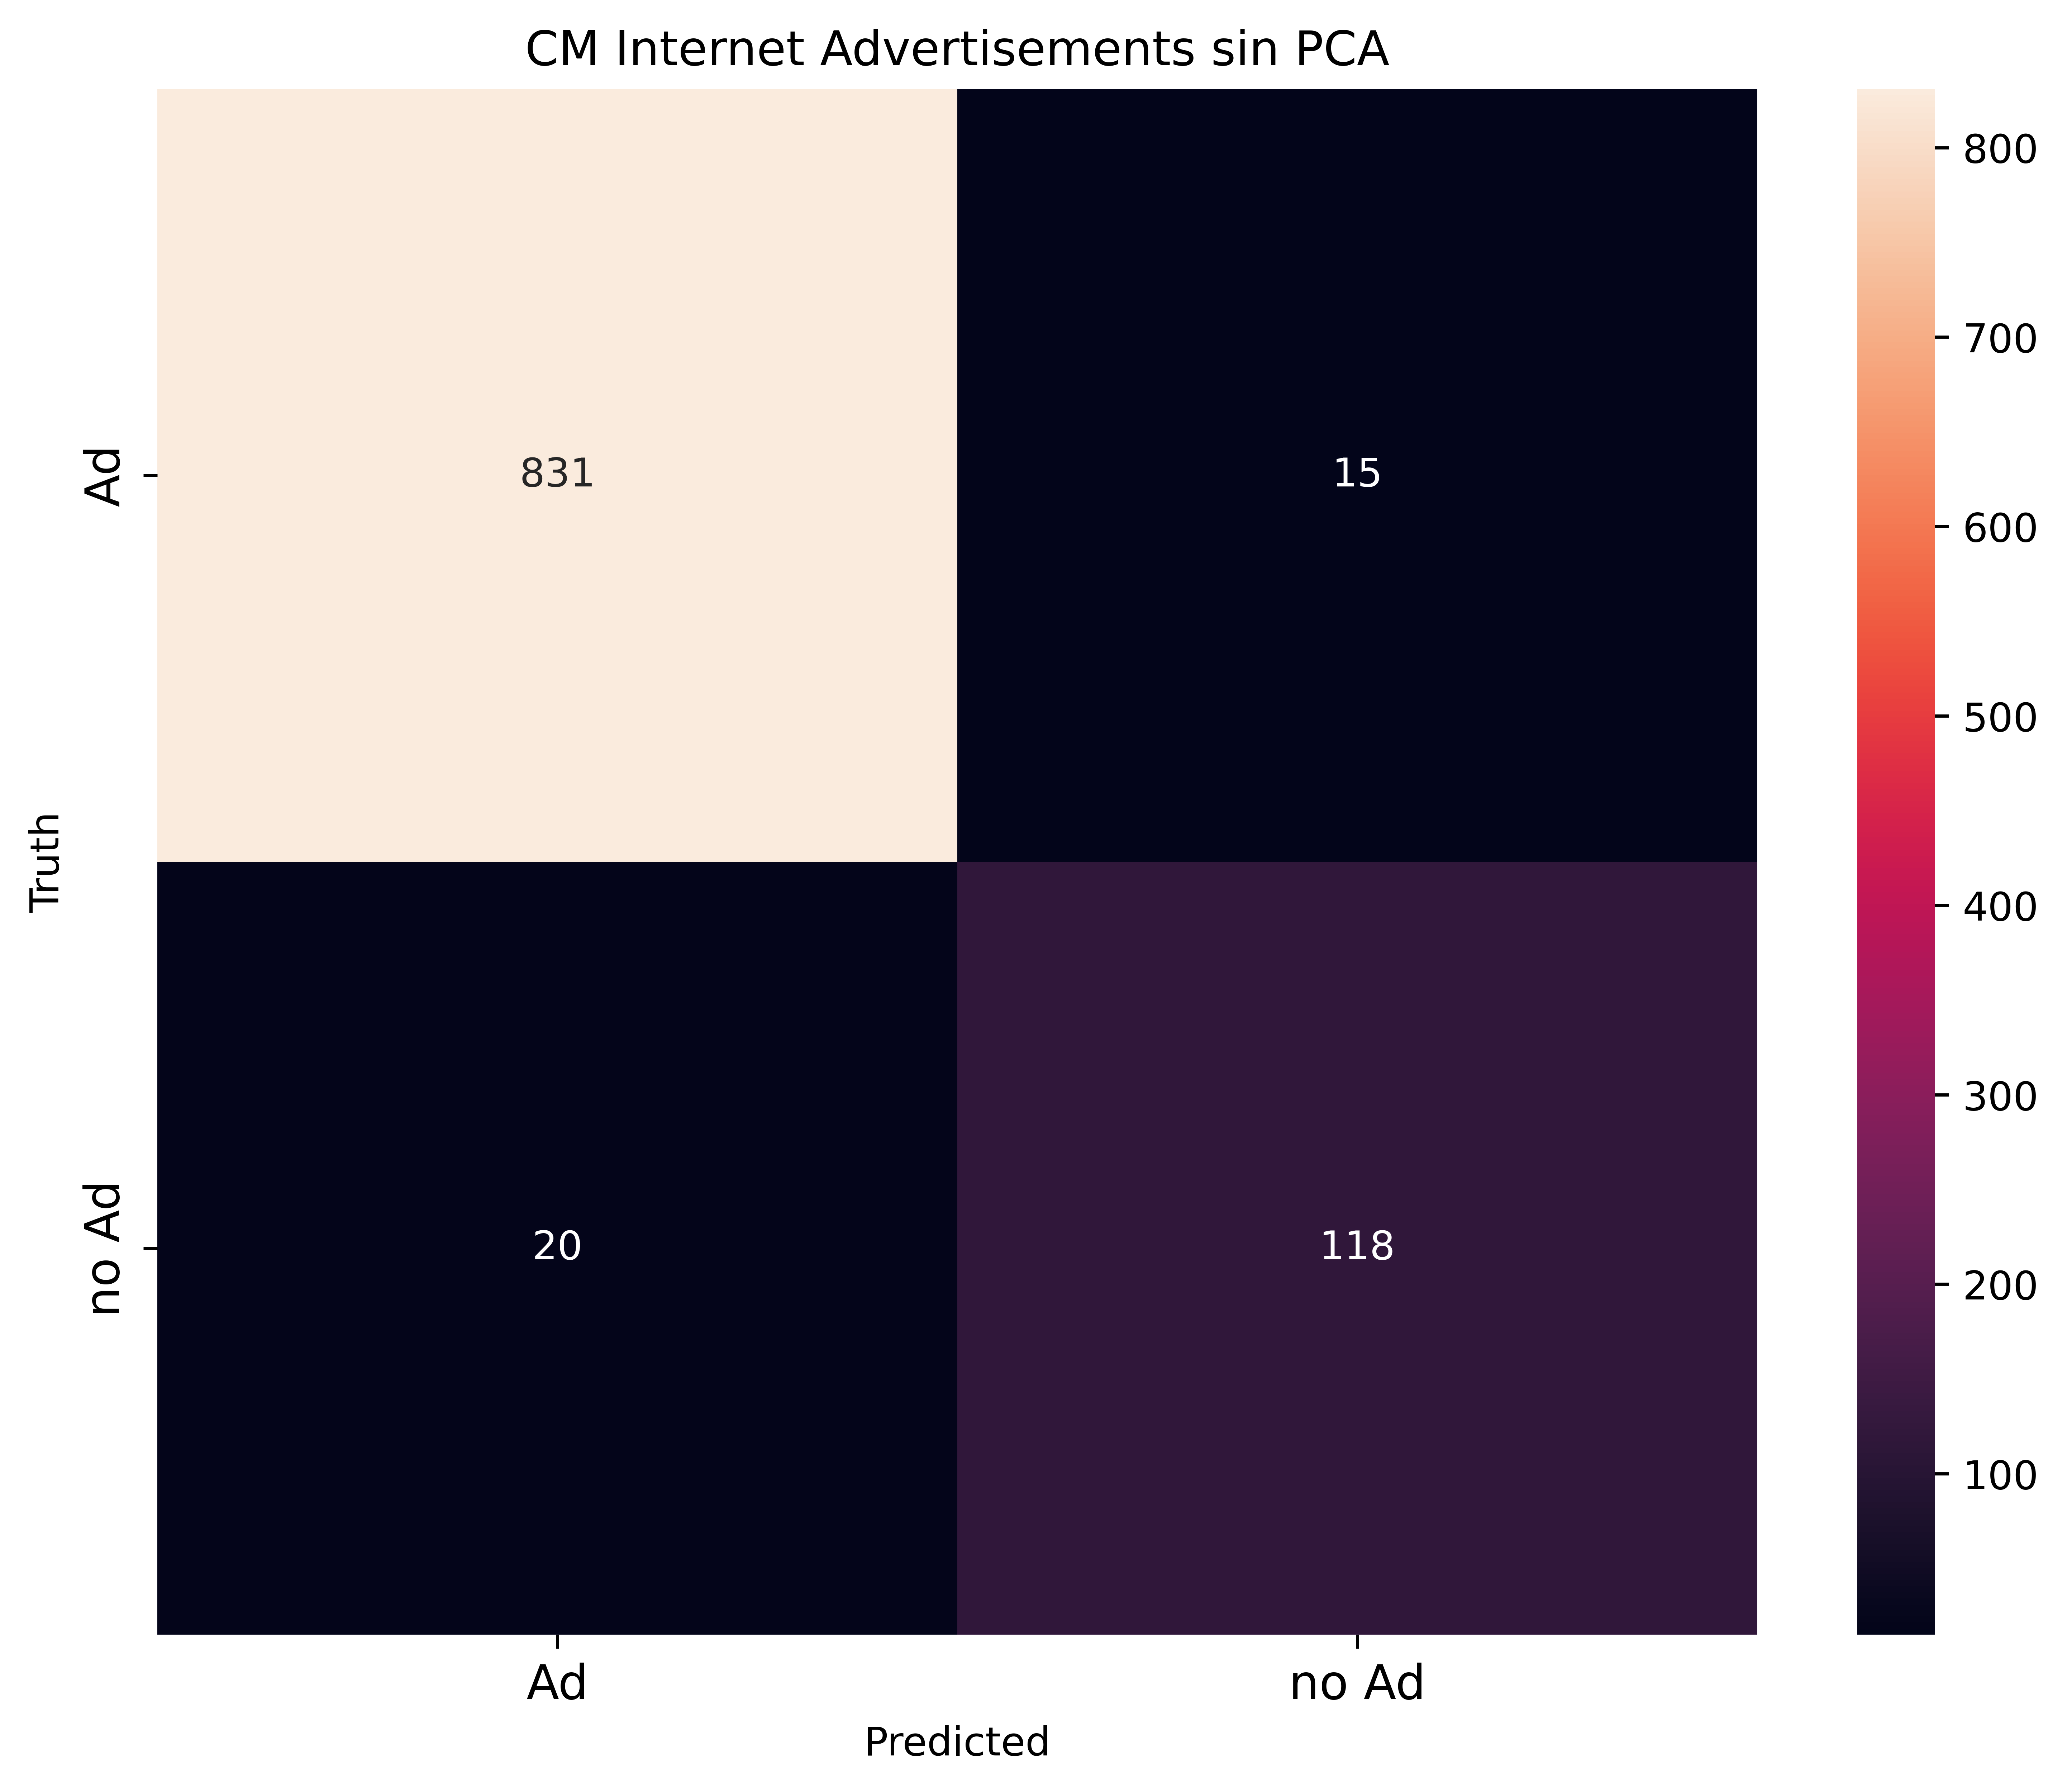

In [626]:
y_predicted_ads = model1_ads.predict(X_test_ads)
y_predicted_ads_labels = [np.argmax(i) for i in y_predicted_ads]
cm_ads = tf.math.confusion_matrix(labels=y_test_ads,predictions=y_predicted_ads_labels)

plt.figure(figsize = (9,7),  dpi=800)
sns.heatmap(cm_ads, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('CM Internet Advertisements sin PCA')
plt.xticks(np.arange(len(classes_ads))+1/2, classes_ads, fontsize=12)
plt.yticks(np.arange(len(classes_ads))+1/2, classes_ads, fontsize=12)


In [523]:
start=time.time()
model2_ads = keras.Sequential([
    keras.layers.Flatten(input_shape=(200,)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2, activation='softmax')  
])

model2_ads.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2_ads.fit(X_train_ads_PCA, y_train_ads, epochs=5)

end=time.time()
print("Tiempo: "+str(end-start))

Epoch 1/5
72/72 [==============================] - 1s 1ms/step - loss: 0.3047 - accuracy: 0.8950
Epoch 2/5
72/72 [==============================] - 0s 984us/step - loss: 0.1002 - accuracy: 0.9712
Epoch 3/5
72/72 [==============================] - 0s 1ms/step - loss: 0.0833 - accuracy: 0.9765
Epoch 4/5
72/72 [==============================] - 0s 1ms/step - loss: 0.0642 - accuracy: 0.9808
Epoch 5/5
72/72 [==============================] - 0s 1ms/step - loss: 0.0536 - accuracy: 0.9834
Tiempo: 0.9046962261199951


In [524]:
model2_ads.evaluate(X_test_ads_PCA, y_test_ads)

31/31 [==============================] - 0s 1ms/step - loss: 0.1176 - accuracy: 0.9644


[0.1175636276602745, 0.9644308686256409]

31/31 [==============================] - 0s 735us/step


([<matplotlib.axis.YTick at 0x1dc54dedd50>,
 [Text(0, 0.5, 'Ad'), Text(0, 1.5, 'no Ad')])

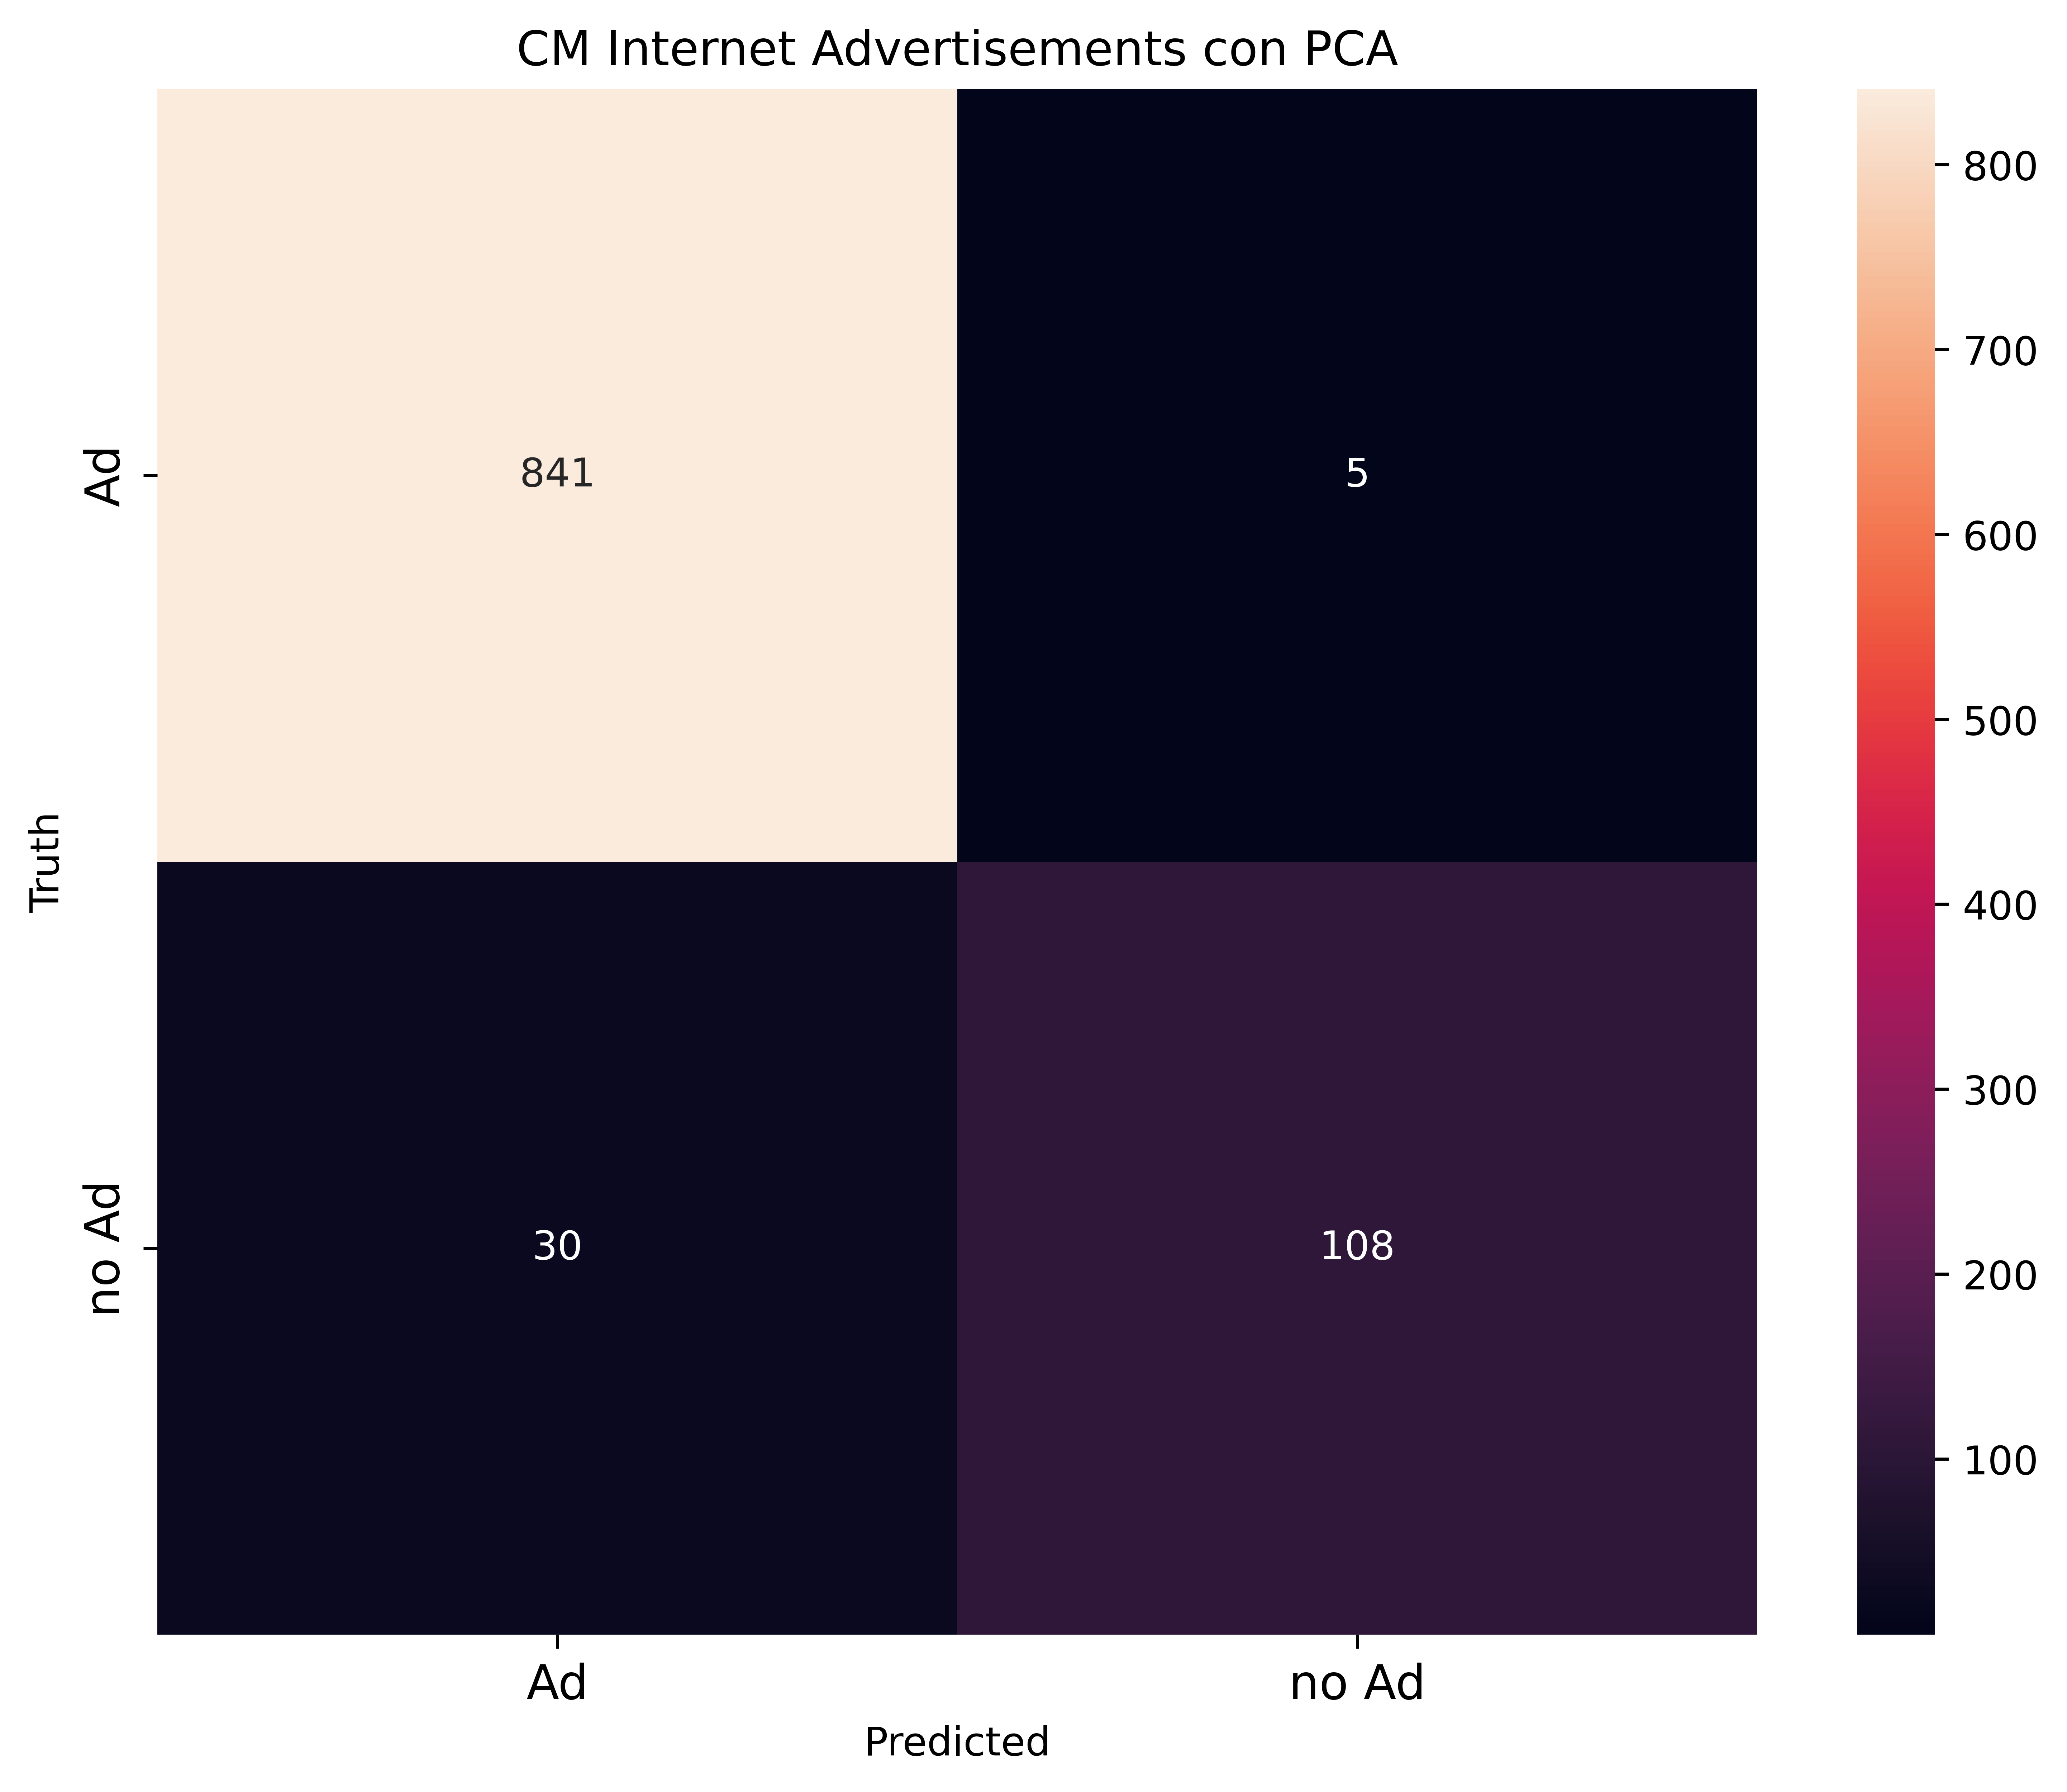

In [627]:
y_predicted_ads_PCA = model2_ads.predict(X_test_ads_PCA)
y_predicted_ads_PCA_labels = [np.argmax(i) for i in y_predicted_ads_PCA]
cm_ads_PCA = tf.math.confusion_matrix(labels=y_test_ads,predictions=y_predicted_ads_PCA_labels)

plt.figure(figsize = (9,7),  dpi=800)
sns.heatmap(cm_ads_PCA, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('CM Internet Advertisements con PCA')
plt.xticks(np.arange(len(classes_ads))+1/2, classes_ads, fontsize=12)
plt.yticks(np.arange(len(classes_ads))+1/2, classes_ads, fontsize=12)

## CIFAR10

In [526]:
start=time.time()
model1_cifar10 = keras.Sequential([
    keras.layers.Flatten(input_shape=(3072,)),
    #keras.layers.Dense(100, activation='sigmoid'),
    #keras.layers.Dense(100, activation='sigmoid'),
    #keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='tanh'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='tanh'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='tanh'),
    #keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  
])

model1_cifar10.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1_cifar10.fit(X_train_cifar10_flattened, y_train_cifar10, epochs=10)

end=time.time()
print("Tiempo: "+str(end-start))

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.9278 - accuracy: 0.2905
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7732 - accuracy: 0.3619
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7160 - accuracy: 0.3798
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6864 - accuracy: 0.3910
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6618 - accuracy: 0.3991
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6434 - accuracy: 0.4053
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6241 - accuracy: 0.4159
Epoch 8/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6112 - accuracy: 0.4195
Epoch 9/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5909 - accuracy: 0.4257
Epoch 10/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.580

In [527]:
model1_cifar10.evaluate(X_test_cifar10_flattened, y_test_cifar10)

313/313 [==============================] - 0s 991us/step - loss: 1.5948 - accuracy: 0.4286


[1.5947659015655518, 0.428600013256073]

313/313 [==============================] - 0s 819us/step


([<matplotlib.axis.YTick at 0x1dc54cc3310>,
 [Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')])

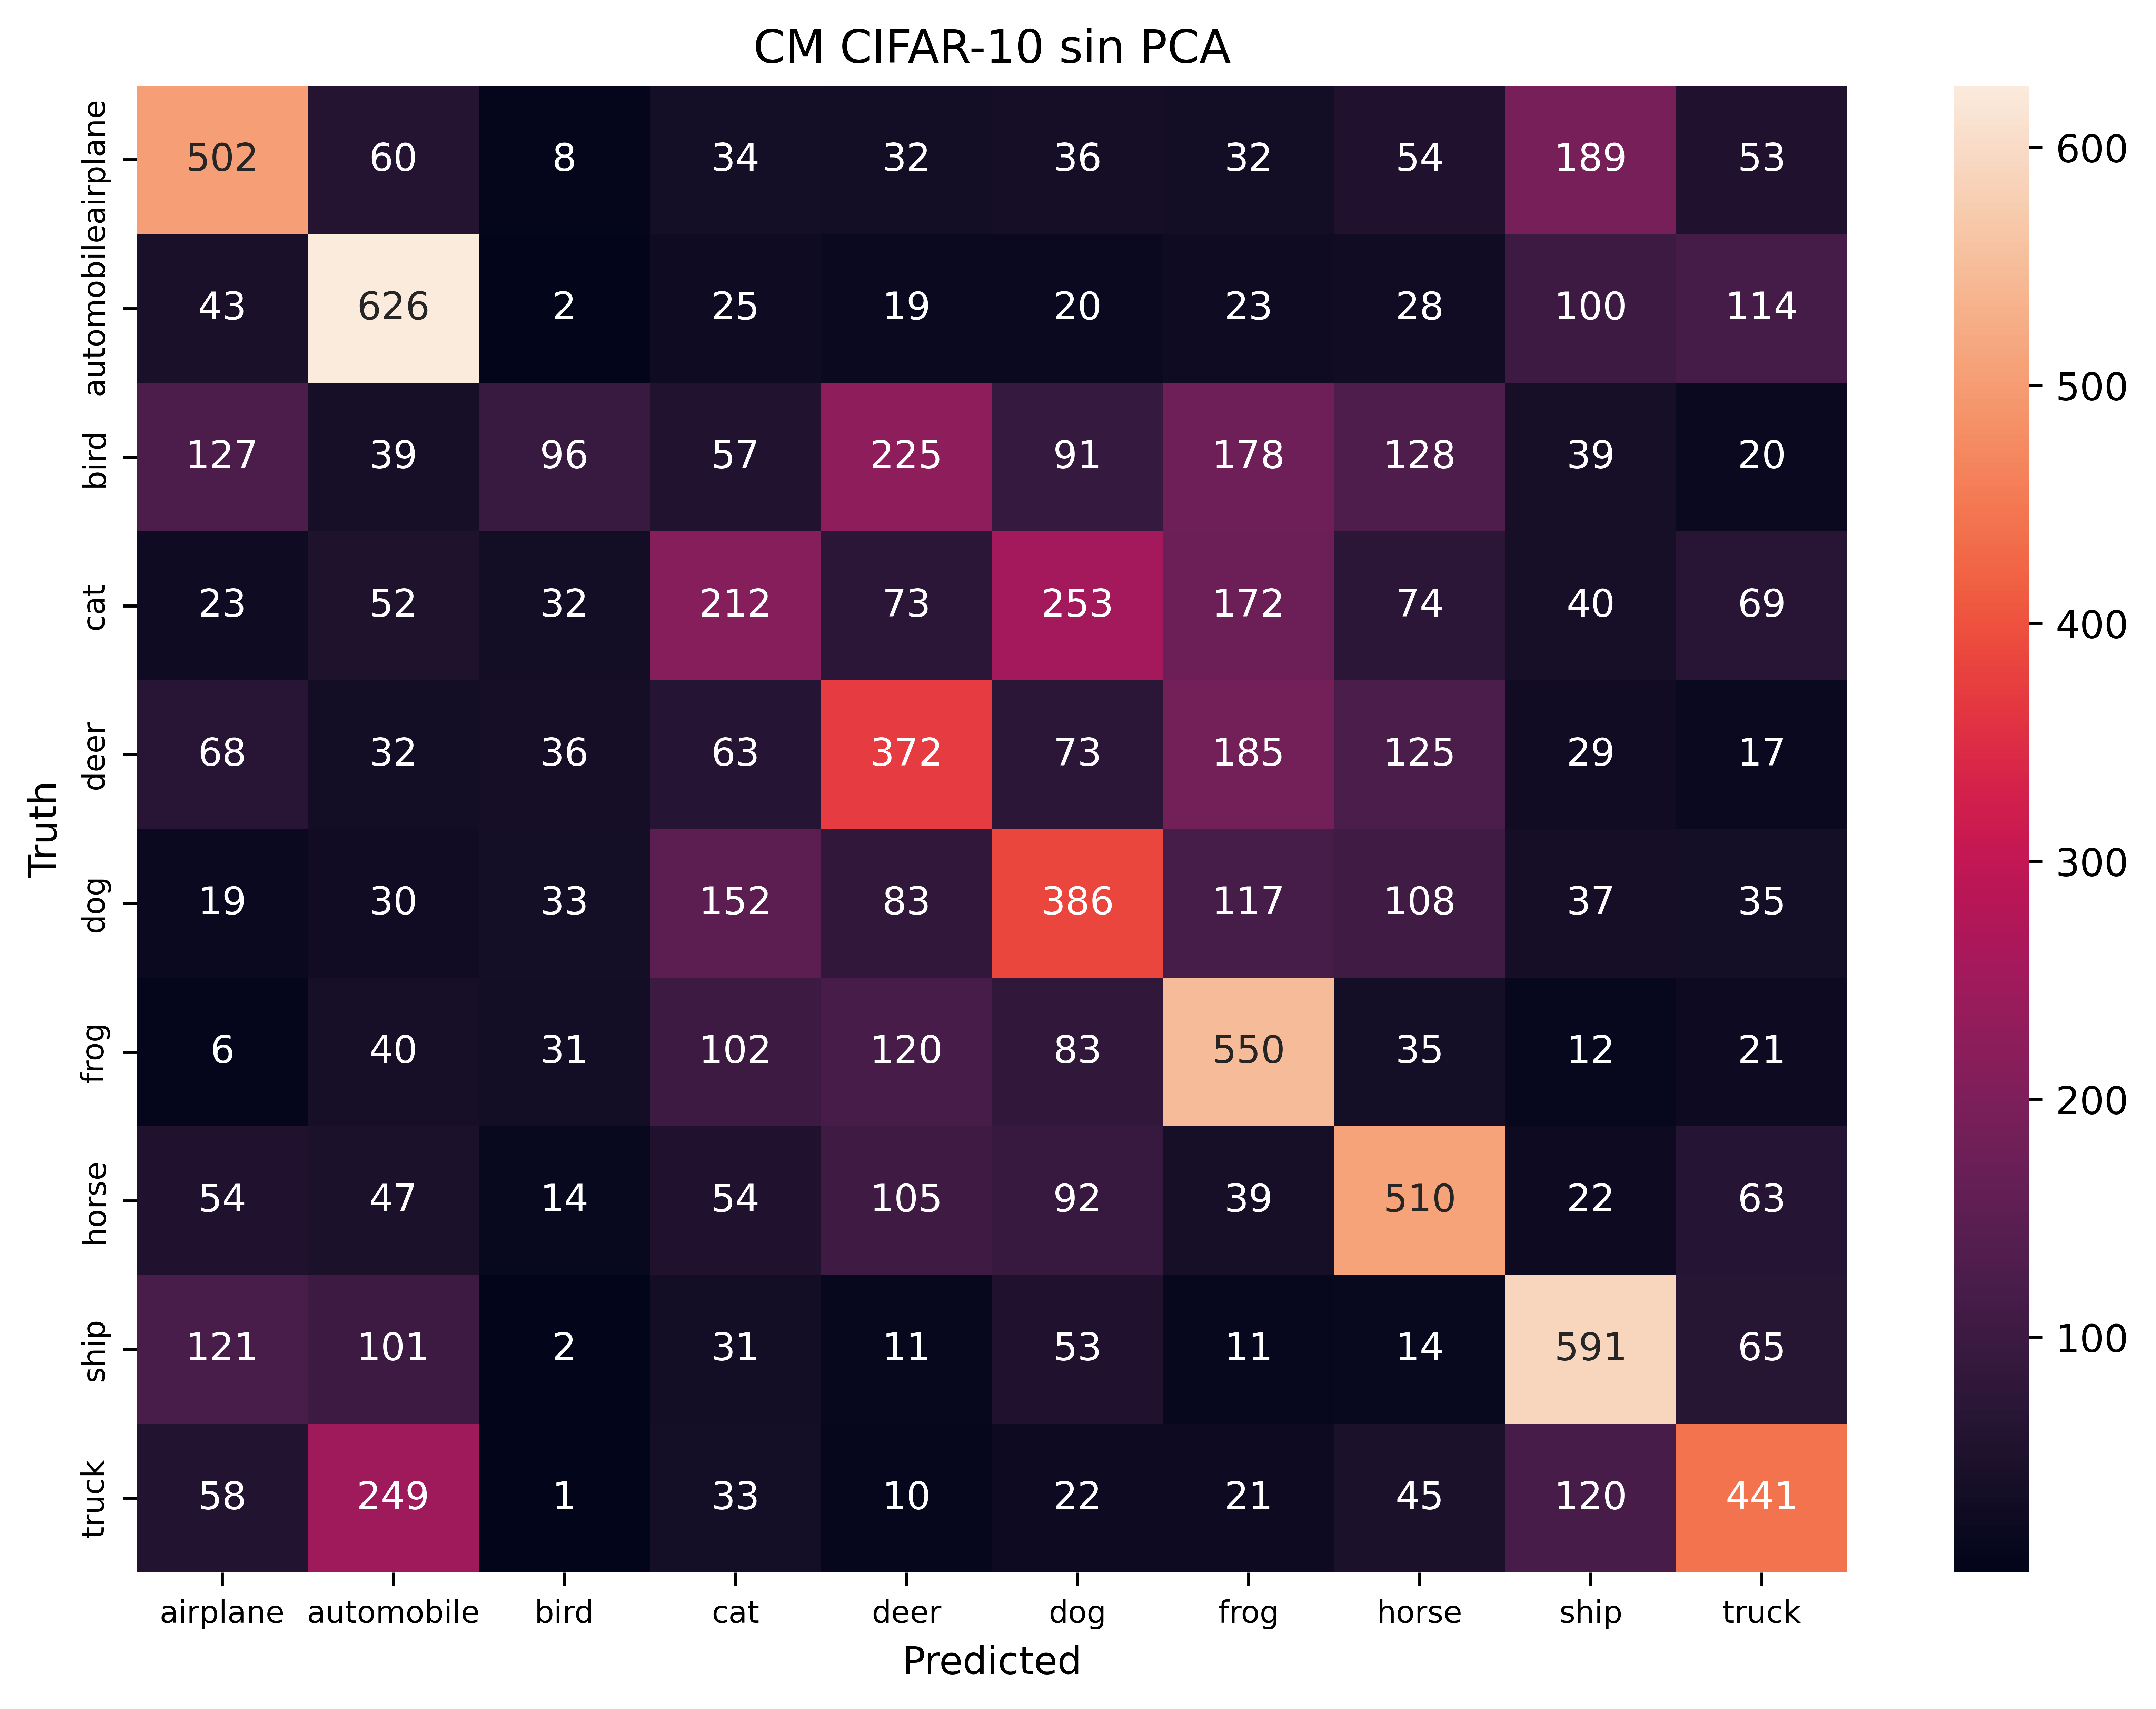

In [628]:
y_predicted_cifar10 = model1_cifar10.predict(X_test_cifar10_flattened)
y_predicted_cifar10_labels = [np.argmax(i) for i in y_predicted_cifar10]
cm_cifar10 = tf.math.confusion_matrix(labels=y_test_cifar10,predictions=y_predicted_cifar10_labels)

plt.figure(figsize = (10,7),  dpi=800)
#plt.imshow(cm_cifar10, interpolation='nearest')
sns.heatmap(cm_cifar10, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('CM CIFAR-10 sin PCA')
plt.xticks(np.arange(len(classes))+1/2, classes, fontsize=8)
plt.yticks(np.arange(len(classes))+1/2, classes, fontsize=8)

In [529]:
start=time.time()
model2_cifar10 = keras.Sequential([
   keras.layers.Flatten(input_shape=(60,)),
   keras.layers.Dense(50, activation='relu'),
   keras.layers.Dense(50, activation='tanh'),
   keras.layers.Dense(50, activation='relu'),
   keras.layers.Dense(50, activation='tanh'),
   keras.layers.Dense(50, activation='relu'),
   keras.layers.Dense(50, activation='tanh'),
   keras.layers.Dense(10, activation='softmax')  
])

model2_cifar10.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2_cifar10.fit(X_train_cifar10_pca, y_train_cifar10, epochs=10)

end=time.time()
print("Tiempo: "+str(end-start))

Epoch 1/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7421 - accuracy: 0.3710
Epoch 2/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.5484 - accuracy: 0.4458
Epoch 3/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4786 - accuracy: 0.4734
Epoch 4/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4320 - accuracy: 0.4867
Epoch 5/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3976 - accuracy: 0.5002
Epoch 6/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3735 - accuracy: 0.5110
Epoch 7/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3510 - accuracy: 0.5179
Epoch 8/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3331 - accuracy: 0.5241
Epoch 9/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3167 - accuracy: 0.5296
Epoch 10/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.303

In [530]:
model2_cifar10.evaluate(X_test_cifar10_pca, y_test_cifar10)

313/313 [==============================] - 0s 914us/step - loss: 1.4230 - accuracy: 0.4996


[1.422954797744751, 0.49959999322891235]

313/313 [==============================] - 0s 677us/step


([<matplotlib.axis.YTick at 0x1dc54c96590>,
 [Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')])

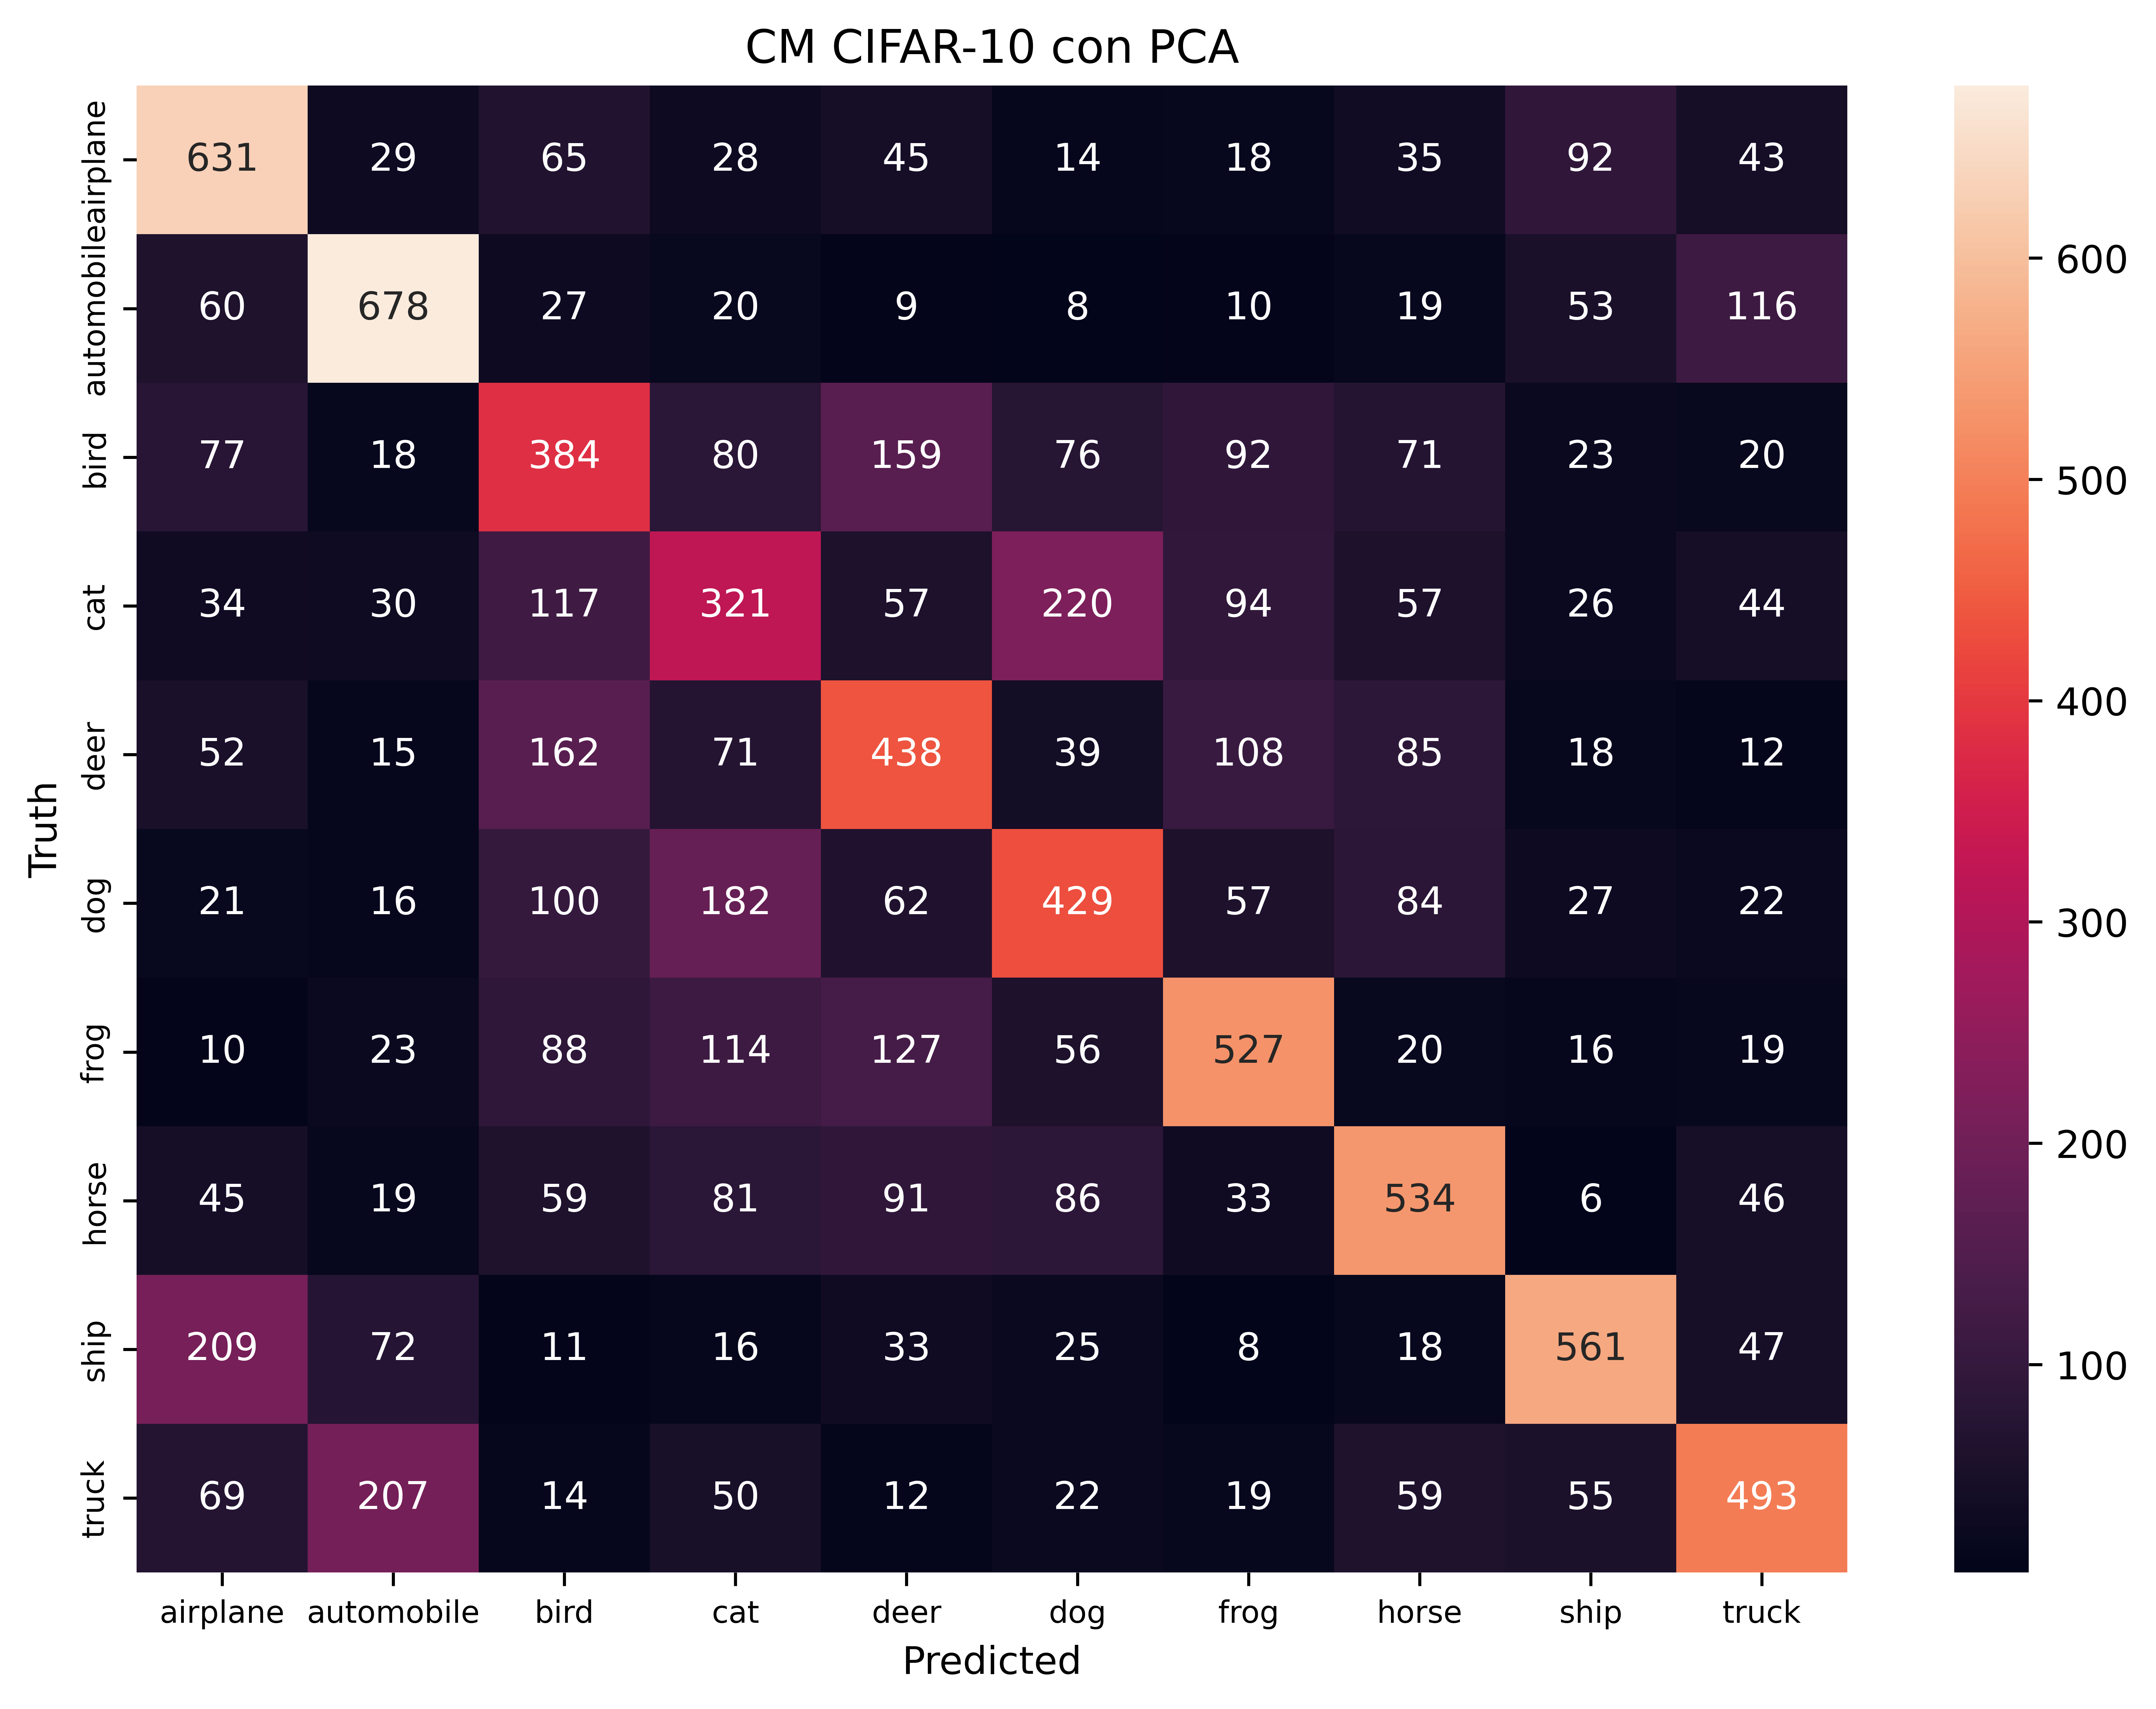

In [629]:
y_predicted_cifar10_pca = model2_cifar10.predict(X_test_cifar10_pca)
y_predicted_cifar10_pca_labels = [np.argmax(i) for i in y_predicted_cifar10_pca]
cm_cifar10_pca = tf.math.confusion_matrix(labels=y_test_cifar10,predictions=y_predicted_cifar10_pca_labels)

plt.figure(figsize = (10,7),  dpi=800)
sns.heatmap(cm_cifar10_pca, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('CM CIFAR-10 con PCA')
plt.xticks(np.arange(len(classes))+1/2, classes, fontsize=8)
plt.yticks(np.arange(len(classes))+1/2, classes, fontsize=8)


# KNN

## FASHION MNIST

In [532]:
# k vecinos con data normal
start=time.time()
knn_mnist = KNeighborsClassifier(20)
knn_mnist.fit(X_train_mnist_flattened,y_train_mnist)
print("Train score before PCA",knn_mnist.score(X_train_mnist_flattened,y_train_mnist),"%")
print("Test score before PCA",knn_mnist.score(X_test_mnist_flattened,y_test_mnist),"%")
end=time.time()
print("Tiempo: "+str(end-start))

Train score before PCA 0.8608166666666667 %
Test score before PCA 0.8415 %
Tiempo: 33.62707471847534


In [533]:
# k vecinos con pca
start=time.time()
knn_mnist_pca = KNeighborsClassifier(20)
knn_mnist_pca.fit(X_train_mnist_pca,y_train_mnist)
print("Train score after PCA",knn_mnist_pca.score(X_train_mnist_pca, y_train_mnist),"%")
print("Test score after PCA",knn_mnist_pca.score(X_test_mnist_pca, y_test_mnist),"%")
end=time.time()
print("Tiempo: "+str(end-start))

Train score after PCA 0.8706 %
Test score after PCA 0.8548 %
Tiempo: 4.348031044006348


## INTERNET ADS

In [534]:
# k vecinos con data normal
start=time.time()
knn_ads = KNeighborsClassifier(20)
knn_ads.fit(X_train_ads,y_train_ads)
print("Train score before PCA",knn_ads.score(X_train_ads,y_train_ads),"%")
print("Test score before PCA",knn_ads.score(X_test_ads,y_test_ads),"%")
end=time.time()
print("Tiempo: "+str(end-start))

Train score before PCA 0.9124183006535947 %
Test score before PCA 0.9105691056910569 %
Tiempo: 0.26421594619750977


In [535]:
# k vecinos con pca
start=time.time()
knn_ads_pca = KNeighborsClassifier(7)
knn_ads_pca.fit(scores_ads,y_train_ads)
print("Train score after PCA",knn_ads_pca.score(X_train_ads_PCA, y_train_ads),"%")
print("Test score after PCA",knn_ads_pca.score(X_test_ads_PCA, y_test_ads),"%")
end=time.time()
print("Tiempo: "+str(end-start))

Train score after PCA 0.9594771241830066 %
Test score after PCA 0.9583333333333334 %
Tiempo: 0.1468966007232666


## CIFAR10

In [536]:
# k vecinos con data normal
start=time.time()
knn_cifar10 = KNeighborsClassifier(20)
knn_cifar10.fit(X_train_cifar10_flattened,y_train_cifar10)
print("Train score before PCA",knn_cifar10.score(X_train_cifar10_flattened,y_train_cifar10),"%")
print("Test score before PCA",knn_cifar10.score(X_test_cifar10_flattened,y_test_cifar10),"%")
end=time.time()
print("Tiempo: "+str(end-start))

Train score before PCA 0.38084 %
Test score before PCA 0.3375 %
Tiempo: 83.81071543693542


In [537]:
# k vecinos con pca
start=time.time()
knn_cifar10_pca = KNeighborsClassifier(20)
knn_cifar10_pca.fit(X_train_cifar10_pca,y_train_cifar10)
print("Train score after PCA",knn_cifar10_pca.score(X_train_cifar10_pca, y_train_cifar10),"%")
print("Test score after PCA",knn_cifar10_pca.score(X_test_cifar10_pca, y_test_cifar10),"%")
end=time.time()
print("Tiempo: "+str(end-start))


Train score after PCA 0.45076 %
Test score after PCA 0.3995 %
Tiempo: 3.189563512802124


# RANDOM FOREST

## FASHION MNIST

In [538]:
# Modelo Random Forest Mnist sin PCA
start=time.time()
random_forest_mnist = RandomForestClassifier(n_estimators=100) 
random_forest_mnist.fit(X_train_mnist_flattened, y_train_mnist) 
predictions_random_forest_mnist_train = random_forest_mnist.predict(X_train_mnist_flattened)
predictions_random_forest_mnist_test = random_forest_mnist.predict(X_test_mnist_flattened)

end=time.time()
print("Tiempo: "+str(end-start))

print("Precisión del modelo train: ", metrics.accuracy_score(y_train_mnist, predictions_random_forest_mnist_train)) 
print("Precisión del modelo test: ", metrics.accuracy_score(y_test_mnist, predictions_random_forest_mnist_test)) 

Tiempo: 93.82987833023071
Precisión del modelo train:  1.0
Precisión del modelo test:  0.8778


In [539]:
# Modelo Random Forest Mnist con PCA
start=time.time()
random_forest_mnist_pca = RandomForestClassifier(n_estimators=100) 
random_forest_mnist_pca.fit(X_train_mnist_pca, y_train_mnist) 
predictions_random_forest_mnist_pca_train = random_forest_mnist_pca.predict(X_train_mnist_pca)
predictions_random_forest_mnist_pca_test = random_forest_mnist_pca.predict(X_test_mnist_pca)

end=time.time()
print("Tiempo: "+str(end-start))

print("Precisión del modelo train: ", metrics.accuracy_score(y_train_mnist, predictions_random_forest_mnist_pca_train)) 
print("Precisión del modelo test: ", metrics.accuracy_score(y_test_mnist, predictions_random_forest_mnist_pca_test)) 

Tiempo: 85.88221073150635
Precisión del modelo train:  1.0
Precisión del modelo test:  0.8583


## INTERNET ADS

In [546]:
# Modelo Random Forest Ads sin PCA
start=time.time()
random_forest_ads = RandomForestClassifier(n_estimators=100) 
random_forest_ads.fit(X_train_ads, y_train_ads) 
predictions_random_forest_ads_train = random_forest_ads.predict(X_train_ads)
predictions_random_forest_ads_test = random_forest_ads.predict(X_test_ads)

end=time.time()
print("Tiempo: "+str(end-start))

print("Precisión del modelo train: ", metrics.accuracy_score(y_train_ads, predictions_random_forest_ads_train)) 
print("Precisión del modelo test: ", metrics.accuracy_score(y_test_ads, predictions_random_forest_ads_test)) 

Tiempo: 1.4813292026519775
Precisión del modelo train:  0.9943355119825708
Precisión del modelo test:  0.9684959349593496


In [547]:
# Modelo Random Forest Ads con PCA
start=time.time()
random_forest_ads_pca = RandomForestClassifier(n_estimators=100) 
random_forest_ads_pca.fit(X_train_ads_PCA, y_train_ads) 
predictions_random_forest_ads_PCA_train = random_forest_ads_pca.predict(X_train_ads_PCA)
predictions_random_forest_ads_PCA_test = random_forest_ads_pca.predict(X_test_ads_PCA)

end=time.time()
print("Tiempo: "+str(end-start))

print("Precisión del modelo train: ", metrics.accuracy_score(y_train_ads, predictions_random_forest_ads_PCA_train)) 
print("Precisión del modelo test: ", metrics.accuracy_score(y_test_ads, predictions_random_forest_ads_PCA_test)) 

Tiempo: 3.1798415184020996
Precisión del modelo train:  0.9943355119825708
Precisión del modelo test:  0.9705284552845529


## CIFAR10

In [542]:
# Modelo Random Forest cifar10 sin PCA
start=time.time()
random_forest_cifar10 = RandomForestClassifier(n_estimators=100) 
random_forest_cifar10.fit(X_train_cifar10_flattened, y_train_cifar10) 
predictions_random_forest_cifar10_train = random_forest_cifar10.predict(X_train_cifar10_flattened)
predictions_random_forest_cifar10_test = random_forest_cifar10.predict(X_test_cifar10_flattened)

end=time.time()
print("Tiempo: "+str(end-start))

print("Precisión del modelo train: ", metrics.accuracy_score(y_train_cifar10, predictions_random_forest_cifar10_train)) 
print("Precisión del modelo test: ", metrics.accuracy_score(y_test_cifar10, predictions_random_forest_cifar10_test)) 

Tiempo: 307.9194416999817
Precisión del modelo train:  1.0
Precisión del modelo test:  0.4695


In [543]:
# Modelo Random Forest cifar10 con PCA
start=time.time()
random_forest_cifar10_pca = RandomForestClassifier(n_estimators=100) 
random_forest_cifar10_pca.fit(X_train_cifar10_pca, y_train_cifar10) 
predictions_random_forest_cifar10_PCA_train = random_forest_cifar10_pca.predict(X_train_cifar10_pca)
predictions_random_forest_cifar10_PCA_test = random_forest_cifar10_pca.predict(X_test_cifar10_pca)

end=time.time()
print("Tiempo: "+str(end-start))

print("Precisión del modelo train: ", metrics.accuracy_score(y_train_cifar10, predictions_random_forest_cifar10_PCA_train)) 
print("Precisión del modelo test: ", metrics.accuracy_score(y_test_cifar10, predictions_random_forest_cifar10_PCA_test)) 

Tiempo: 71.90471005439758
Precisión del modelo train:  1.0
Precisión del modelo test:  0.4681


# Resultados

In [575]:
# create data 
x = [1,2,3]
# NN, KNN, RF
accuracy_mnist_train = [ 0.8909, 0.8608, 1.0] 
accuracy_ads_train = [0.9895, 0.9124, 0.9943] 
accuracy_cifar10_train = [0.4269, 0.3808, 1.0] 

accuracy_mnist_pca_train = [ 0.8978, 0.8707, 1.0] 
accuracy_ads_pca_train = [0.9839, 0.9590, 0.9943] 
accuracy_cifar10_pca_train = [0.5371, 0.4515, 1.0]

accuracy_mnist_test = [ 0.8780, 0.8415, 0.8778] 
accuracy_ads_test = [0.9685, 0.9105, 0.9685] 
accuracy_cifar10_test = [0.4228, 0.3375, 0.4695] 

accuracy_mnist_pca_test = [0.8756, 0.8547, 0.8583] 
accuracy_ads_pca_test = [0.9634, 0.9502, 0.9705] 
accuracy_cifar10_pca_test = [0.4916, 0.4017, 0.4681]

tiempo_ent_mnist = [12.0732, 33.6271, 93.8299] 
tiempo_ent_ads = [1.0885, 0.2642, 1.4813] 
tiempo_ent_cifar10 = [28.4183, 83.8107, 307.9194]

tiempo_ent_mnist_pca = [9.6498, 4.3480, 85.8822] 
tiempo_ent_ads_pca = [0.9046, 0.1469, 3.1798] 
tiempo_ent_cifar10_pca = [17.7594, 3.1896, 71.9047]

  


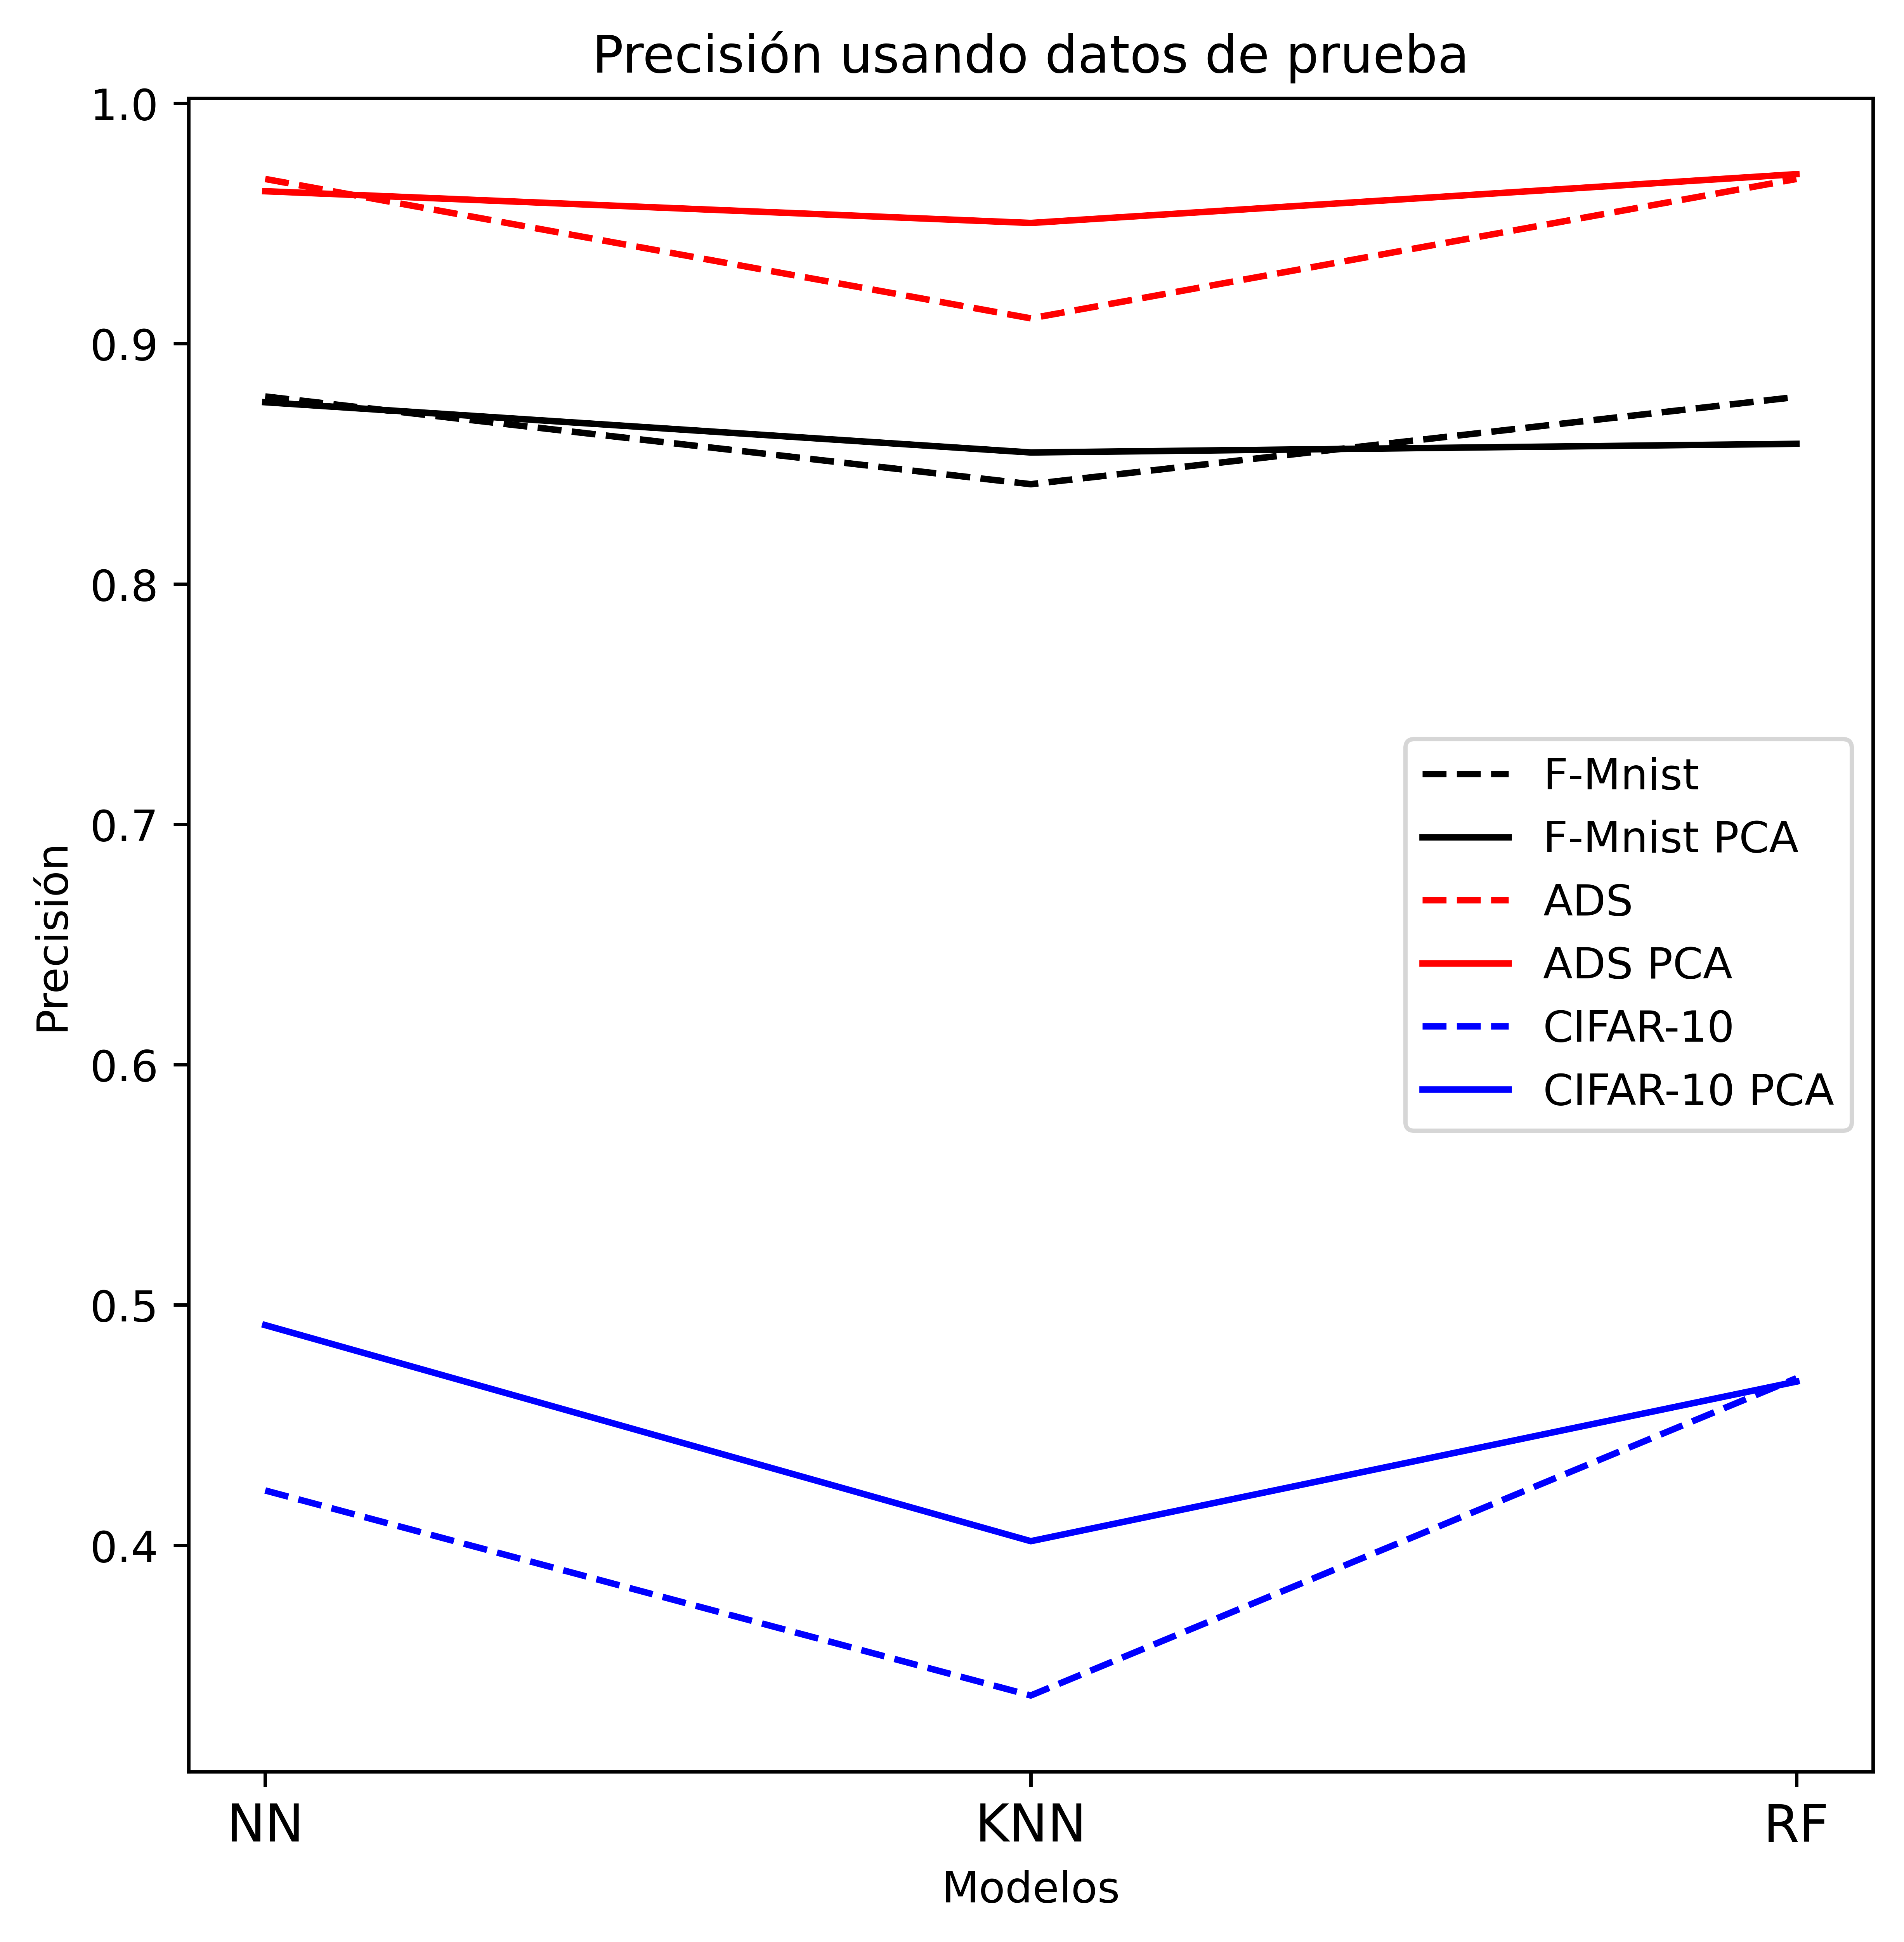

In [630]:
# plot lines 
fig = plt.figure(figsize=(7,7),  dpi=800)
plt.plot(x, accuracy_mnist_test, label = "F-Mnist", color='k', linestyle='dashed', ) 
plt.plot(x, accuracy_mnist_pca_test, label = "F-Mnist PCA", color='k', linestyle='solid', ) 
plt.plot(x, accuracy_ads_test, label = "ADS", color='r', linestyle='dashed',  ) 
plt.plot(x, accuracy_ads_pca_test, label = "ADS PCA", color='r', linestyle='solid', ) 
plt.plot(x, accuracy_cifar10_test, label = "CIFAR-10", color='b', linestyle='dashed') 
plt.plot(x, accuracy_cifar10_pca_test, label = "CIFAR-10 PCA", color='b', linestyle='solid') 
plt.legend() 

modelos=['NN','KNN','RF']

plt.xlabel('Modelos')
plt.ylabel('Precisión')
plt.title('Precisión usando datos de prueba')
plt.xticks(np.arange(len(modelos))+1, modelos, fontsize=12)

plt.show()

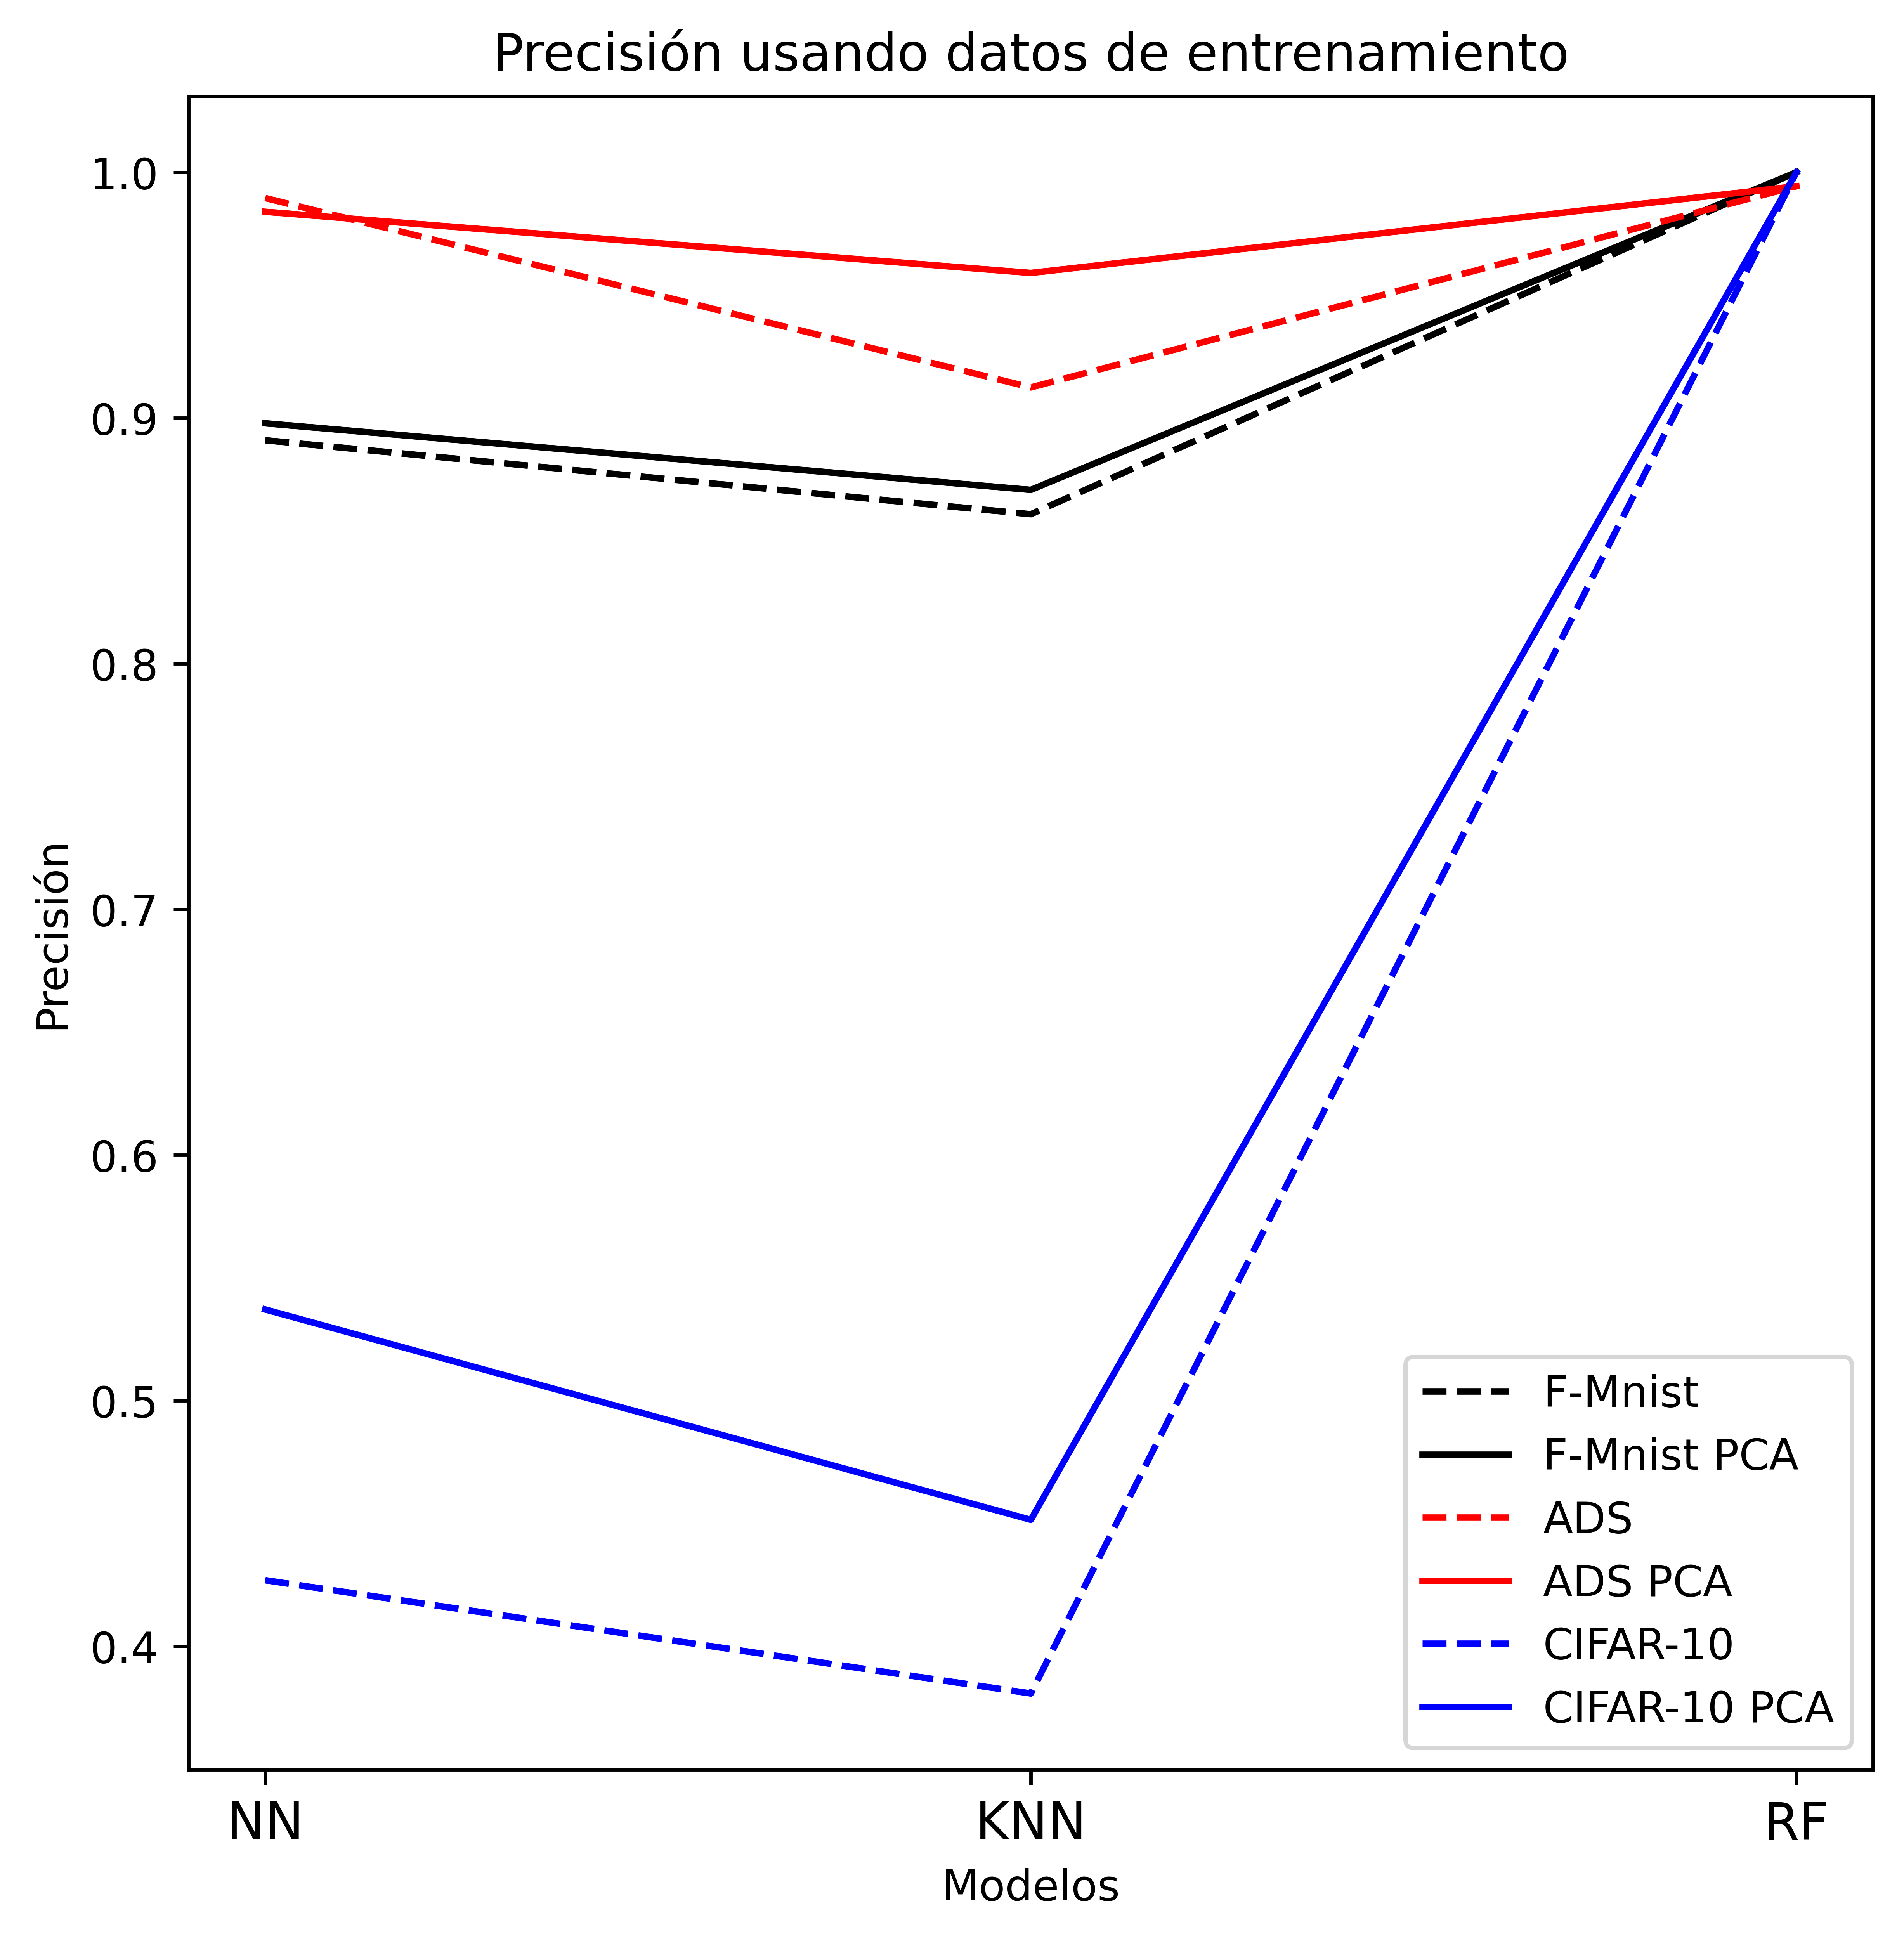

In [631]:
# plot lines 
fig = plt.figure(figsize=(7,7),  dpi=800)
plt.plot(x, accuracy_mnist_train, label = "F-Mnist", color='k', linestyle='dashed', ) 
plt.plot(x, accuracy_mnist_pca_train, label = "F-Mnist PCA", color='k', linestyle='solid', ) 
plt.plot(x, accuracy_ads_train, label = "ADS", color='r', linestyle='dashed',  ) 
plt.plot(x, accuracy_ads_pca_train, label = "ADS PCA", color='r', linestyle='solid', ) 
plt.plot(x, accuracy_cifar10_train, label = "CIFAR-10", color='b', linestyle='dashed') 
plt.plot(x, accuracy_cifar10_pca_train, label = "CIFAR-10 PCA", color='b', linestyle='solid') 
plt.legend() 

modelos=['NN','KNN','RF']

plt.xlabel('Modelos')
plt.ylabel('Precisión')
plt.title('Precisión usando datos de entrenamiento')
plt.xticks(np.arange(len(modelos))+1, modelos, fontsize=12)

plt.show()

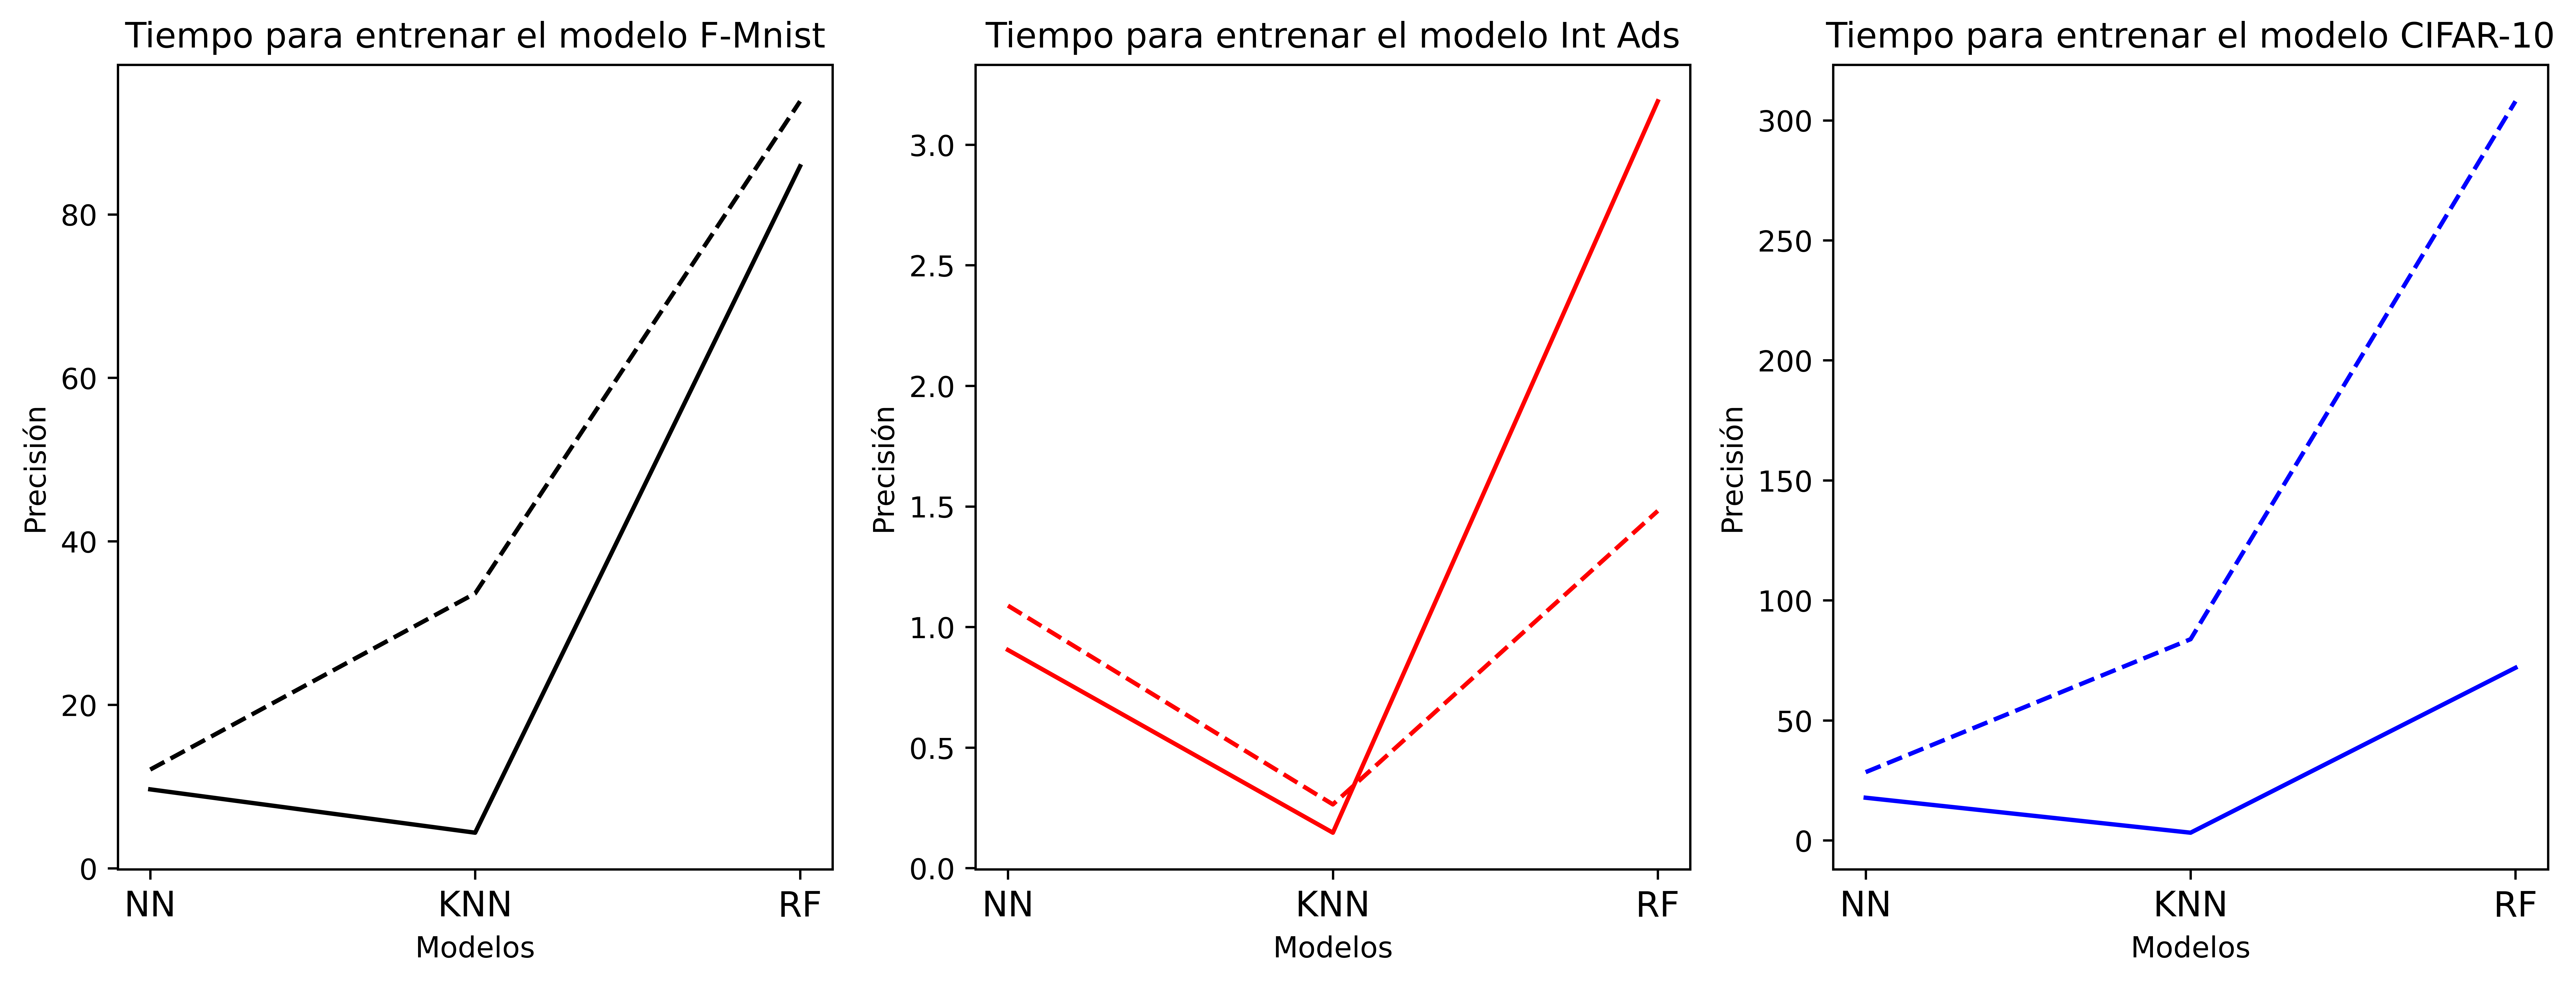

In [634]:
# plot lines 
modelos=['NN','KNN','RF']


fig = plt.figure(figsize=(15,5),  dpi=800)

plt.subplot(131)
plt.plot(x,tiempo_ent_mnist, label = "F-Mnist", color='k', linestyle='dashed') 
plt.plot(x, tiempo_ent_mnist_pca, label = "F-Mnist PCA", color='k', linestyle='solid')
plt.xlabel('Modelos')
plt.ylabel('Precisión')
plt.title('Tiempo para entrenar el modelo F-Mnist')
plt.xticks(np.arange(len(modelos))+1, modelos, fontsize=12)

plt.subplot(132)
plt.plot(x, tiempo_ent_ads, label = "ADS", color='r', linestyle='dashed') 
plt.plot(x, tiempo_ent_ads_pca, label = "ADS PCA", color='r', linestyle='solid' ) 
plt.xlabel('Modelos')
plt.ylabel('Precisión')
plt.title('Tiempo para entrenar el modelo Int Ads')
plt.xticks(np.arange(len(modelos))+1, modelos, fontsize=12)

ax3 = plt.subplot(133)
plt.plot(x, tiempo_ent_cifar10, label = "CIFAR-10", color='b', linestyle='dashed') 
plt.plot(x, tiempo_ent_cifar10_pca, label = "CIFAR-10 PCA", color='b', linestyle='solid')
plt.xlabel('Modelos')
plt.ylabel('Precisión')
plt.title('Tiempo para entrenar el modelo CIFAR-10')
plt.xticks(np.arange(len(modelos))+1, modelos, fontsize=12)


plt.show()